This jupyter notebook is used for data cleaning and analysis of the data of the public administration provided by Reply.
In this file you can find the following sections:

1. Data Cleaning and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Some queries given to the agent, manually analyzed and compared with the results of the agent

## Data Cleaning and Preprocessing
In this section we will clean and preprocess the data to make it ready for the analysis. In particular, we transform datasets' names and columns headers. Then, we transform all the names in lowercase.
At the end, some little transofrmations, changing yes/no to 1/0, and creating age_group and income_brackets variables. 

In [1]:
import pandas as pd
import os

# Percorsi standardizzati
input_folder = "raw_datasets"
output_folder = "datasets"
os.makedirs(output_folder, exist_ok=True)

# Mapping nomi dei file
filename_mapping = {
    "EntryAccreditoStipendi_202501.csv": "salary.csv",
    "EntryAccessoAmministrati_202501.csv": "admin_access.csv",
    "EntryPendolarismo_202501.csv": "commuters.csv",
    "EntryAmministratiPerFasciaDiReddito_202501.csv": "income_brackets.csv"
}


In [2]:
# Mapping nomi colonne (puoi modificarlo a tuo piacimento)
column_mappings = {
    "EntryAccreditoStipendi_202501.csv": {
        "comune_della_sede": "municipality",
        "amministrazione": "administration",
        "eta_min": "min_age",
        "eta_max": "max_age",
        "sesso": "gender",
        "modalita_pagamento": "payment_method",
        "numero": "salary_records"
    },
    "EntryAccessoAmministrati_202501.csv": {
        "regione_residenza_domicilio": "region_of_residence",
        "amministrazione_appartenenza": "administration",
        "sesso": "gender",
        "eta_max": "max_age",
        "eta_min": "min_age",
        "modalita_autenticazione": "authentication_method",
        "numero_occorrenze": "number_of_occurrences"
    },
    "EntryPendolarismo_202501.csv": {
        "provincia_della_sede": "province",
        "comune_della_sede": "municipality",
        "stesso_comune": 'lives_and_works_same_municipality',
        "ente": "administration",
        "numero_amministrati": "number_of_commuters",
        "distanza_min_KM": "commute_distance_min_km",
        "distanza_max_KM": "commute_distance_max_km"
    },
    "EntryAmministratiPerFasciaDiReddito_202501.csv": {
        "comparto": "sector",
        "regione_residenza": "region_of_residence",
        "sesso": "gender",
        "eta_min": "min_age",
        "eta_max": "max_age",
        "aliquota_max": "max_tax_rate",
        "fascia_reddito_min": "min_income_bracket",
        "fascia_reddito_max": "max_income_bracket",
        "numerosita": "population_size"
    }
}

# Aggiunge la colonna age_group se presenti min_age e max_age
def add_age_group(df):
    if "min_age" in df.columns and "max_age" in df.columns:
        df["age_group"] = df["min_age"].astype(str) + "-" + df["max_age"].astype(str)
        # Reordina le colonne con age_group subito dopo max_age
        cols = df.columns.tolist()
        idx = cols.index("max_age") + 1
        cols = cols[:idx] + ["age_group"] + [c for c in cols if c not in cols[:idx] + ["age_group"]]
        df = df[cols]
    return df

# Loop di trasformazione file
for original_file, new_file in filename_mapping.items():
    input_path = os.path.join(input_folder, original_file)
    if not os.path.exists(input_path):
        print(f"⚠️ File not found: {input_path} — Skipping.")
        continue

    df = pd.read_csv(input_path)
    # Mappatura nomi colonne
    df.rename(columns=column_mappings[original_file], inplace=True)
    df.columns = [col.lower() for col in df.columns]  # Tutti i nomi in minuscolo
    df = add_age_group(df)
    output_path = os.path.join(output_folder, new_file)
    df.to_csv(output_path, index=False)
    print(f"✅ Saved {new_file} to {output_folder}/")

✅ Saved salary.csv to datasets/
✅ Saved admin_access.csv to datasets/
✅ Saved commuters.csv to datasets/
✅ Saved income_brackets.csv to datasets/


In [3]:
commuters_df = pd.read_csv(os.path.join(output_folder, "commuters.csv"))
commuters = commuters_df

In [4]:
import pandas as pd

# Load datasets
salary = pd.read_csv("datasets/salary.csv")
admin_access = pd.read_csv("datasets/admin_access.csv")
commuters = pd.read_csv("datasets/commuters.csv")
income_brackets = pd.read_csv("datasets/income_brackets.csv")

In [5]:
# Transform all string values to lowercase
salary = salary.applymap(lambda x: x.lower() if isinstance(x, str) else x)
admin_access = admin_access.applymap(lambda x: x.lower() if isinstance(x, str) else x)
commuters = commuters.applymap(lambda x: x.lower() if isinstance(x, str) else x)
income_brackets = income_brackets.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Save the transformed datasets
salary.to_csv("datasets/salary.csv", index=False)
admin_access.to_csv("datasets/admin_access.csv", index=False)
commuters.to_csv("datasets/commuters.csv", index=False)
income_brackets.to_csv("datasets/income_brackets.csv", index=False)

/var/folders/b9/r20p41v577g1k8jfkq256tp80000gn/T/ipykernel_20382/1947945941.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  salary = salary.applymap(lambda x: x.lower() if isinstance(x, str) else x)
/var/folders/b9/r20p41v577g1k8jfkq256tp80000gn/T/ipykernel_20382/1947945941.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  admin_access = admin_access.applymap(lambda x: x.lower() if isinstance(x, str) else x)
/var/folders/b9/r20p41v577g1k8jfkq256tp80000gn/T/ipykernel_20382/1947945941.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  commuters = commuters.applymap(lambda x: x.lower() if isinstance(x, str) else x)
/var/folders/b9/r20p41v577g1k8jfkq256tp80000gn/T/ipykernel_20382/1947945941.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  income_brackets = income_brackets.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [6]:
# function to convert max_age to int64
def convert_max_age(df):
    df["max_age"] = pd.to_numeric(df["max_age"], errors="coerce").astype("Int64")
    return df
    
# apply the function
salary = convert_max_age(salary)
income_brackets = convert_max_age(income_brackets)
admin_access = convert_max_age(admin_access)

In [7]:
# Convert distance columns to numeric
commuters["distance_min_km"] = pd.to_numeric(commuters["distance_min_km"], errors="coerce").astype("Int64")
commuters["distance_max_km"] = pd.to_numeric(commuters["distance_max_km"], errors="coerce").astype("Int64")

# Rename columns to match the new naming convention
commuters.rename(columns={
    "distance_min_km": "commute_distance_min_km",
    "distance_max_km": "commute_distance_max_km"
}, inplace=True)

In [8]:
#yes/no to 1/0
commuters["lives_and_works_same_municipality"] = commuters["lives_and_works_same_municipality"].map({
    "si": 1,
    "no": 0
})
commuters.to_csv('datasets/commuters.csv', index=False)

In [9]:
# Get information about each dataset
print("Salary Dataset Info:")
print(salary.info())
print("\nAdmin Access Dataset Info:")
print(admin_access.info())
print("\nCommuters Dataset Info:")
print(commuters.info())
print("\nIncome Brackets Dataset Info:")
print(income_brackets.info())   

Salary Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25580 entries, 0 to 25579
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   municipality    25580 non-null  object
 1   administration  25580 non-null  object
 2   min_age         25580 non-null  int64 
 3   max_age         23355 non-null  Int64 
 4   age_group       25580 non-null  object
 5   gender          25580 non-null  object
 6   payment_method  25580 non-null  object
 7   salary_records  25580 non-null  int64 
dtypes: Int64(1), int64(2), object(5)
memory usage: 1.6+ MB
None

Admin Access Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8528 entries, 0 to 8527
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   region_of_residence    8528 non-null   object
 1   administration         8528 non-null   object
 2   gender                 

In [10]:
import pandas as pd

income_df = pd.read_csv("datasets/income_brackets.csv")

# function to combine min and max income bracket
def combine_income_brackets(row):
    min_val = row["min_income_bracket"]
    max_val = row["max_income_bracket"]

    try:
        if pd.isna(max_val):
            return f"{int(min_val)}+"
        else:
            return f"{int(min_val)}–{int(max_val)}"
    except:
        return "Invalid"

# apply and save
income_df["income_bracket_range"] = income_df.apply(combine_income_brackets, axis=1)


In [11]:
file_path = 'datasets/salary.csv'
df = pd.read_csv(file_path)

import os

# m to 1 and f to 0
df['gender'] = df['gender'].map({'m': 1, 'f': 0})

# save the new DataFrame to a CSV file 
df.to_csv('datasets/salary.csv', index=False)

In [12]:
file_path = 'datasets/admin_access.csv'
df = pd.read_csv(file_path)

import os

# m to 1 and f to 0
df['gender'] = df['gender'].map({'m': 1, 'f': 0})

# save the new DataFrame to a CSV file 
df.to_csv('datasets/admin_access.csv', index=False)

In [13]:
import pandas as pd
file_path = 'datasets/income_brackets.csv'
df = pd.read_csv(file_path)

import os

# m to 1 and f to 0
df['gender'] = df['gender'].map({'m': 1, 'f': 0})   

# save the new DataFrame to a CSV file
df.to_csv('datasets/income_brackets.csv', index=False)

## Exploratory Data Analysis
In this notebook is showed some insights, patterns and distribution of the four datasets provided by Reply. The key idea is to show how data are distribution and some plots or analysis insights are useful to understand if some agent's answers are right or wrong. 




—— Admin Access ——
 Shape: (8528, 8)
Columns: ['region_of_residence', 'administration', 'gender', 'max_age', 'age_group', 'min_age', 'authentication_method', 'number_of_occurrences']
Types:
region_of_residence      object
administration           object
gender                    int64
max_age                  object
age_group                object
min_age                   int64
authentication_method    object
number_of_occurrences     int64
dtype: object
First 5 rows:
  region_of_residence               administration  gender max_age age_group  \
0             abruzzo  a.o. s. giovanni addolorata       0      34     25-34   
1             abruzzo  a.o. s. giovanni addolorata       1      34     25-34   
2             abruzzo  a.o.r.n. antonio cardarelli       1      44     35-44   

   min_age authentication_method  number_of_occurrences  
0       25                  spid                      2  
1       25                  spid                      3  
2       35                  sp

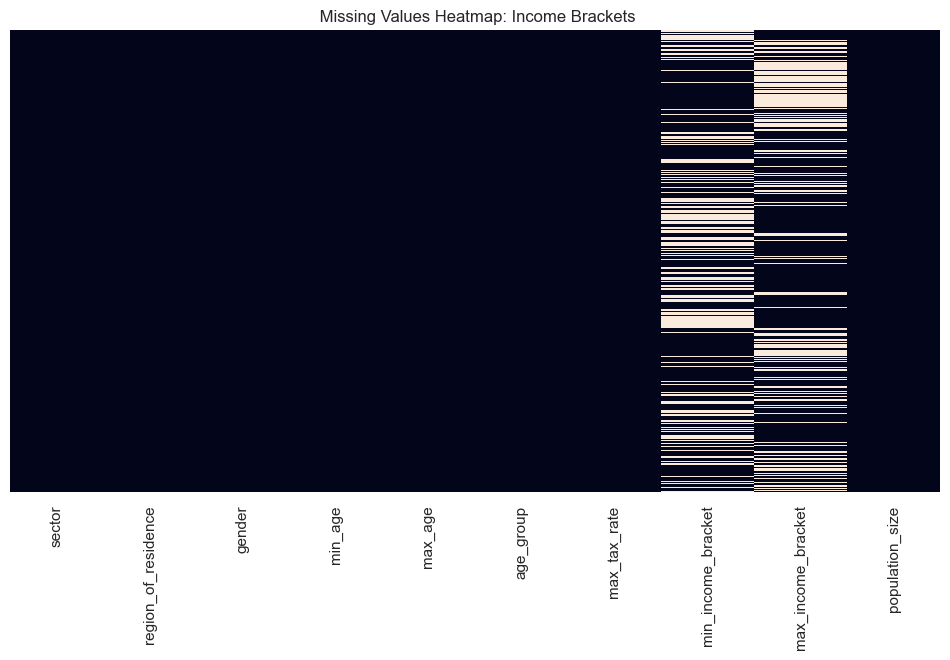


—— MISSING DATA: Commuters ——
                         MissingCount  MissingPercent
commute_distance_min_km          6045       24.333790
commute_distance_max_km          2152        8.662749


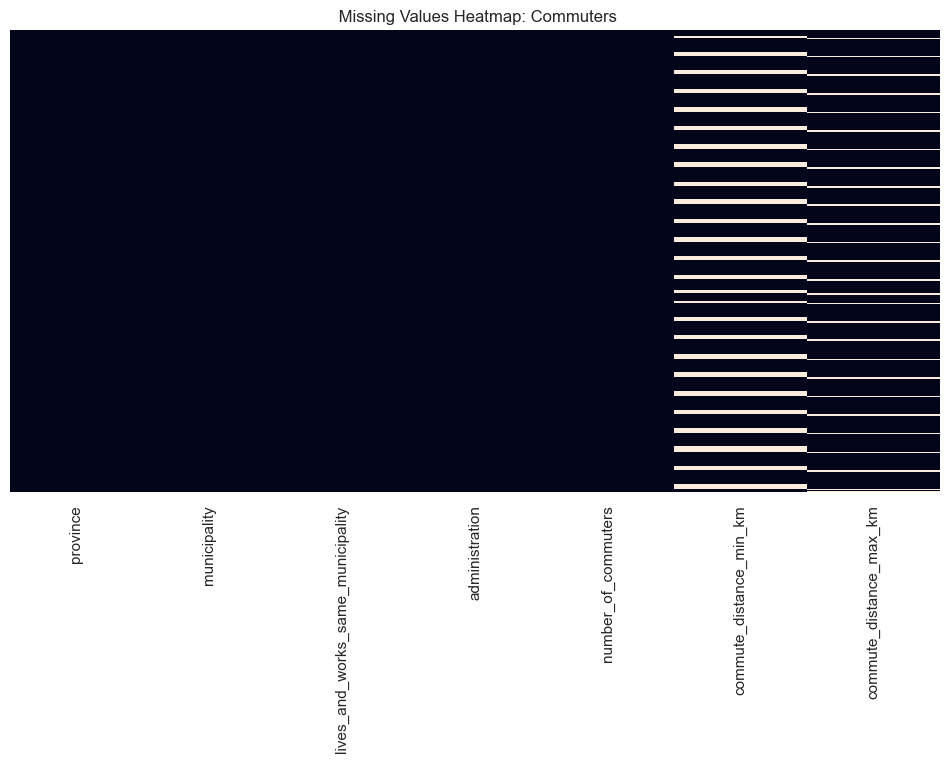

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# from datasets/
datasets_info = {
    "Admin Access": "admin_access.csv",
    "Salary": "salary.csv",
    "Income Brackets": "income_brackets.csv",
    "Commuters": "commuters.csv"
}

datasets = {}

# 1. overview datasets
for name, filename in datasets_info.items():
    file_path = os.path.join("datasets", filename)
    df = pd.read_csv(file_path)
    datasets[name] = df
    
    print(f"\n—— {name} ——")
    print(f" Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"Types:\n{df.dtypes}")
    print(f"First 5 rows:\n{df.head(3)}")

# 2. Missing values + heatmap
for name, df in datasets.items():
    print(f"\n—— MISSING DATA: {name} ——")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        "MissingCount": missing,
        "MissingPercent": missing_pct
    })
    missing_df = missing_df[missing_df["MissingCount"] > 0]
    print(missing_df)

    if not missing_df.empty:
        plt.figure()
        sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
        plt.title(f" Missing Values Heatmap: {name}")
        plt.show()


In [15]:
#Descriptive statistics
for name, df in datasets.items():
    print(f"\n--- DESCRIPTIVE STATISTICS: {name} ---")
    numeriche = df.select_dtypes(include=[np.number])
    categoriche = df.select_dtypes(exclude=[np.number])

    print("Numeric:")
    print(numeriche.describe())

    print("\nCategorical:")
    for col in categoriche.columns:
        print(f"\n{col} - {df[col].nunique()} categories")  
        print(df[col].value_counts().head())


--- DESCRIPTIVE STATISTICS: Admin Access ---
Numeric:
            gender      min_age  number_of_occurrences
count  8528.000000  8528.000000            8528.000000
mean      0.536820    42.994137             177.795145
std       0.498672    13.882474            1124.427105
min       0.000000    18.000000               2.000000
25%       0.000000    35.000000               3.000000
50%       1.000000    45.000000               9.000000
75%       1.000000    55.000000              42.000000
max       1.000000    65.000000           29526.000000

Categorical:

region_of_residence - 21 categories
region_of_residence
lazio       1256
campania     676
puglia       538
sicilia      530
toscana      481
Name: count, dtype: int64

administration - 81 categories
administration
ministero della difesa                    1015
ministero dell'interno                     912
ministero dell'istruzione e del merito     770
ministero della giustizia                  573
agenzia delle entrate            


--- UNIVARIATE ANALYSIS: Admin Access ---


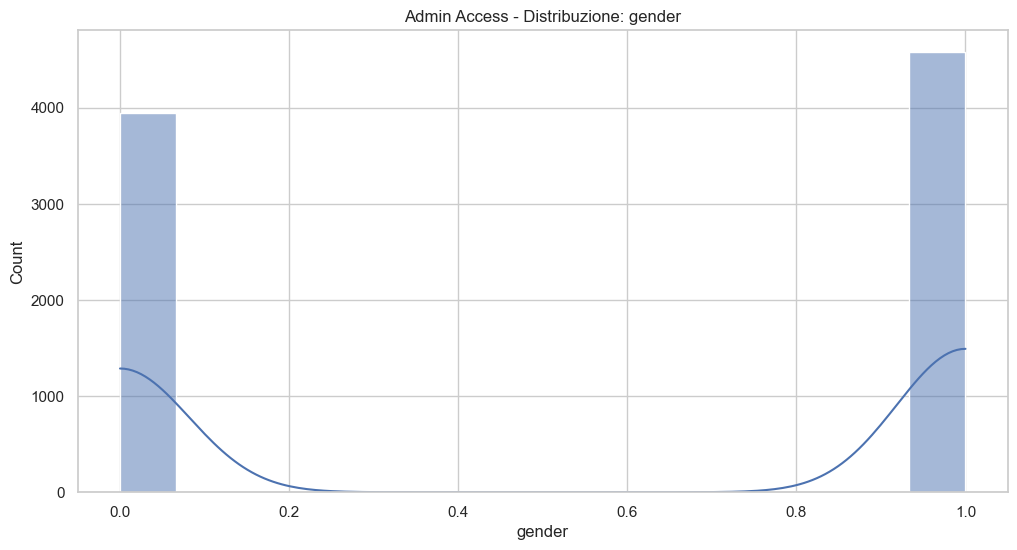

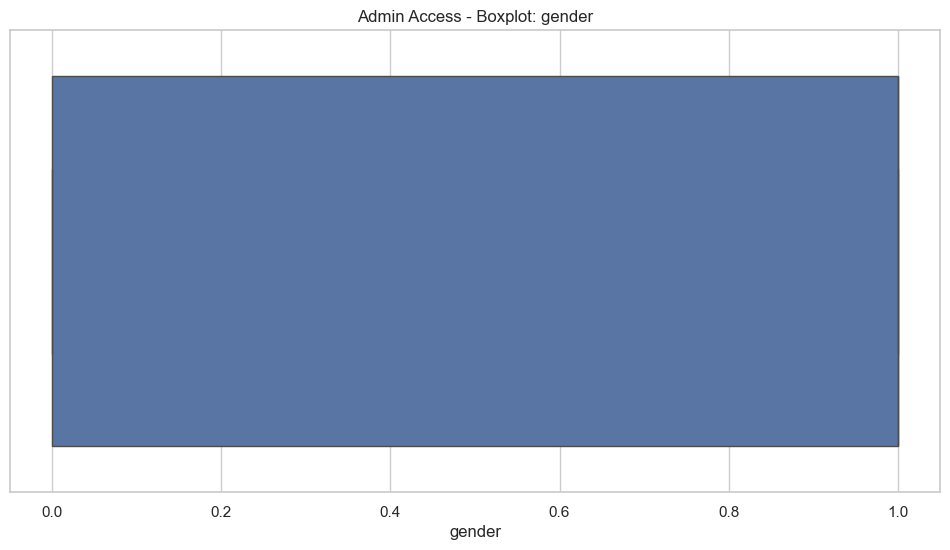

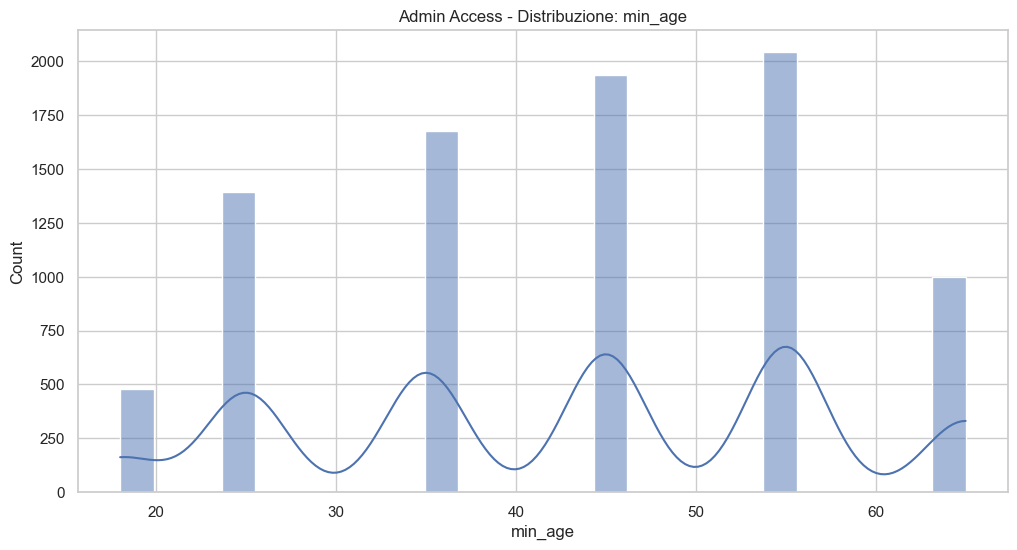

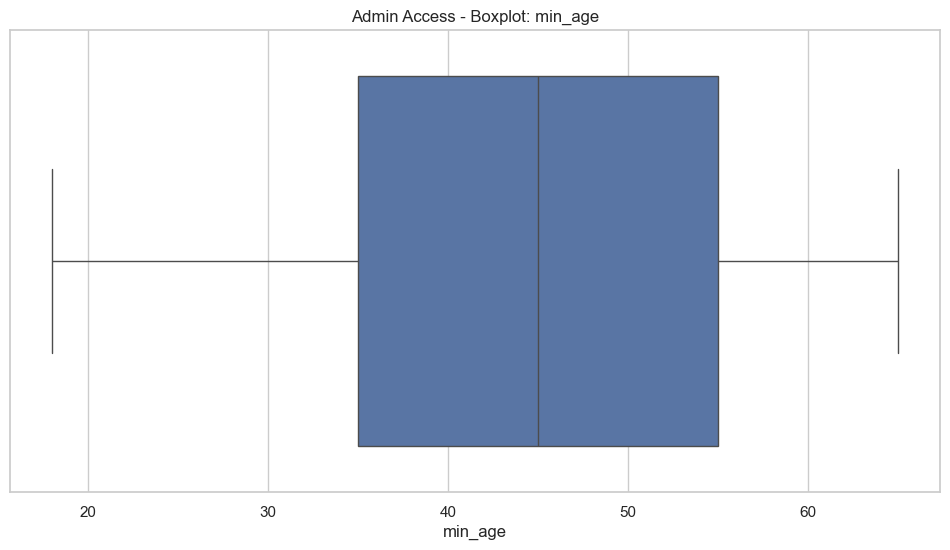

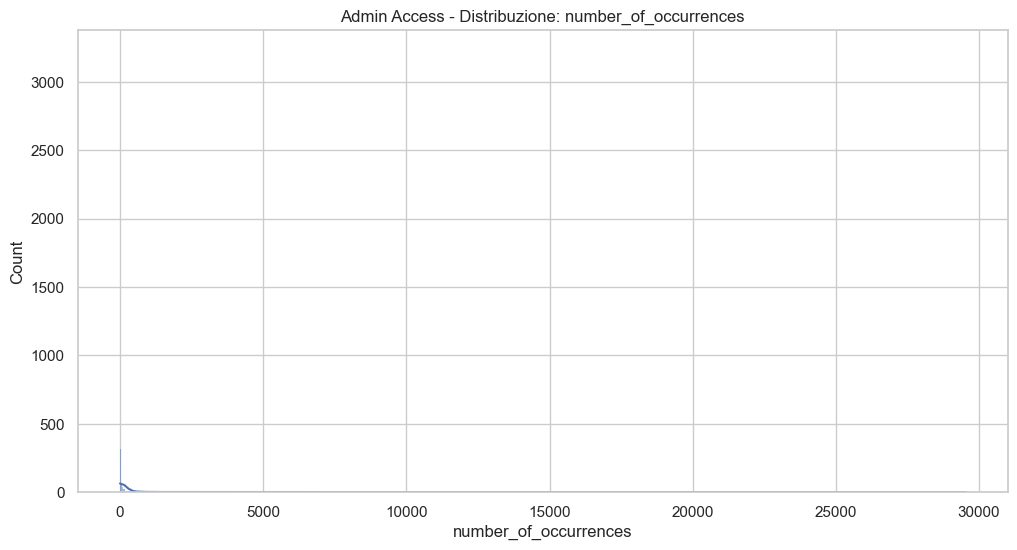

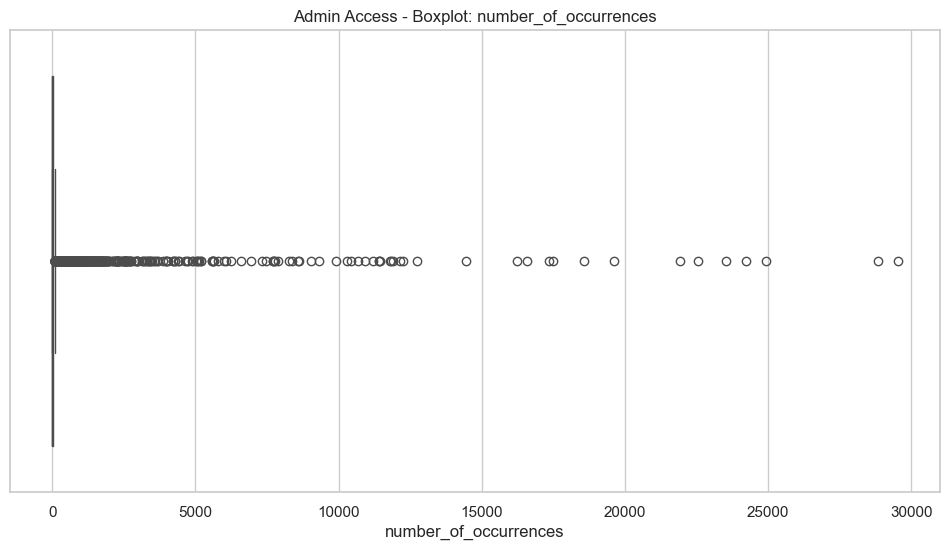

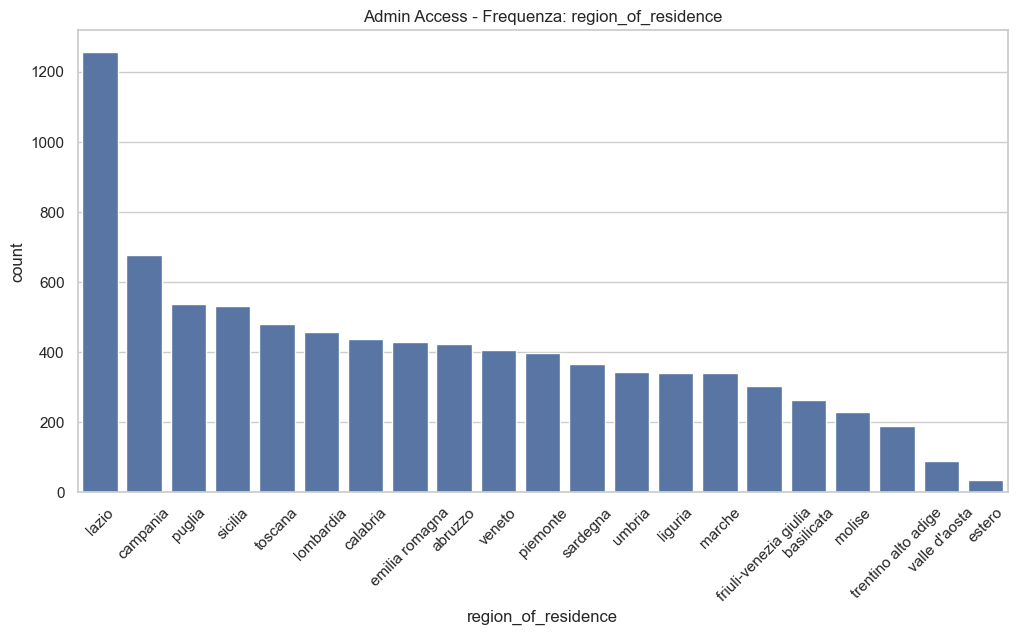

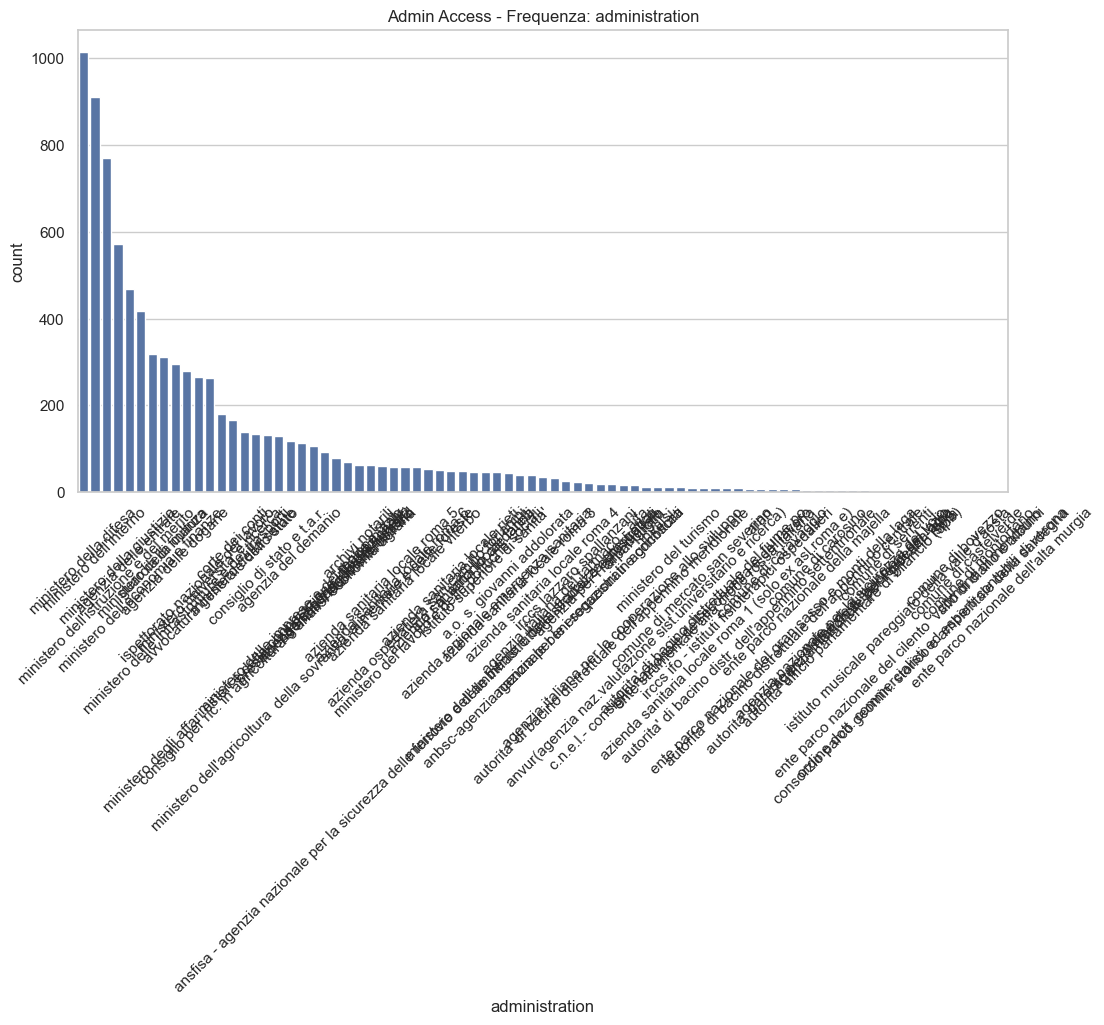

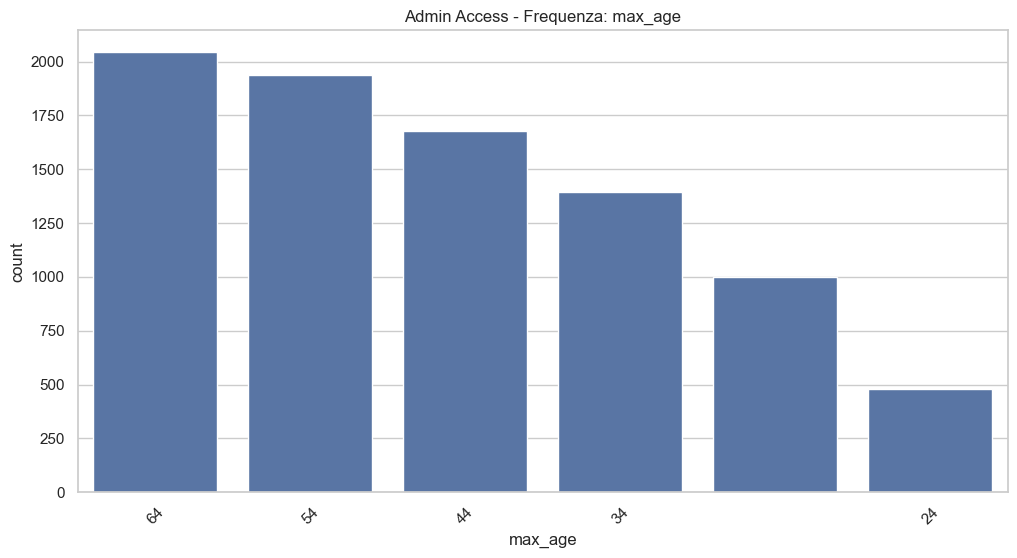

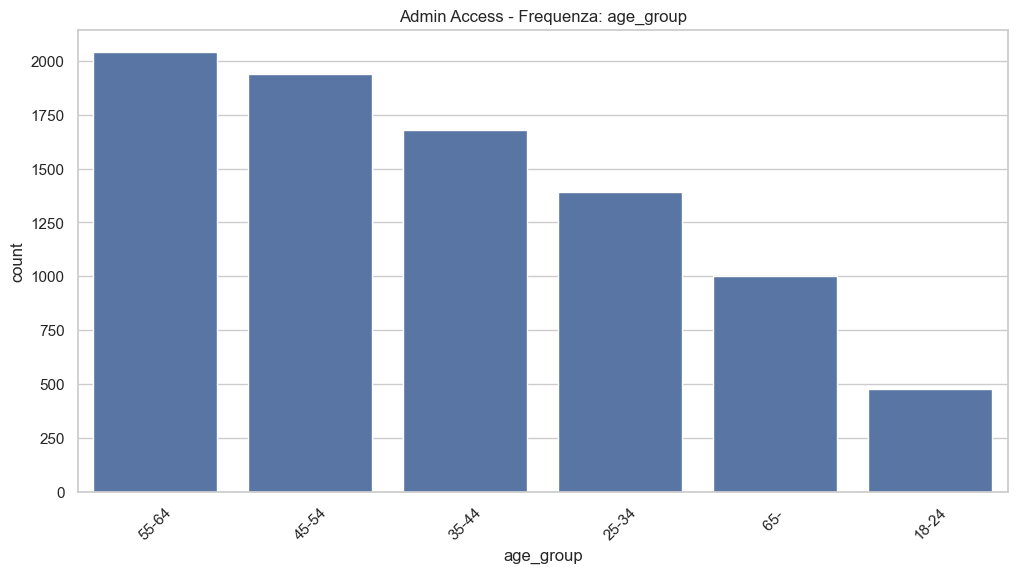

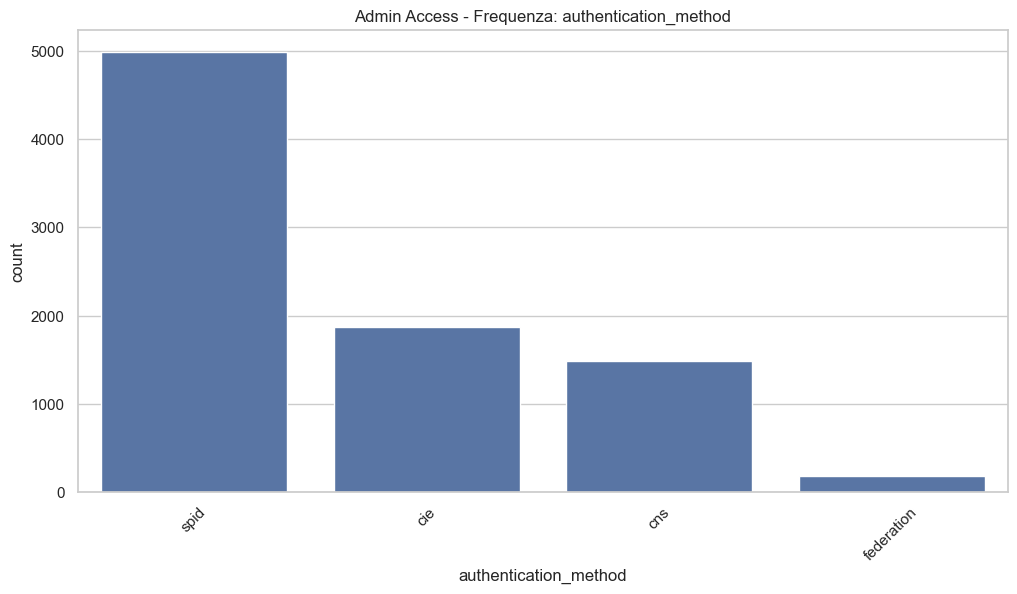


--- UNIVARIATE ANALYSIS: Salary ---


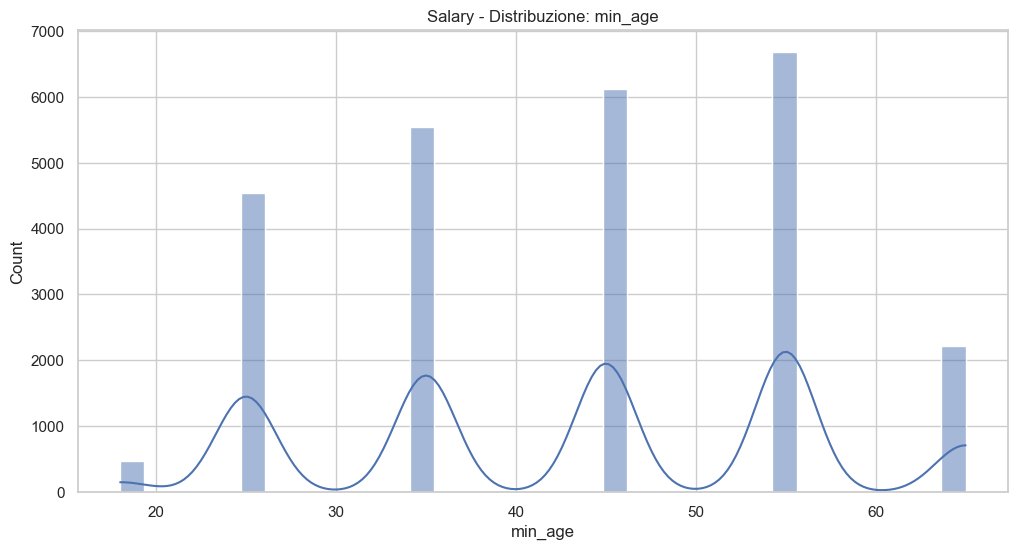

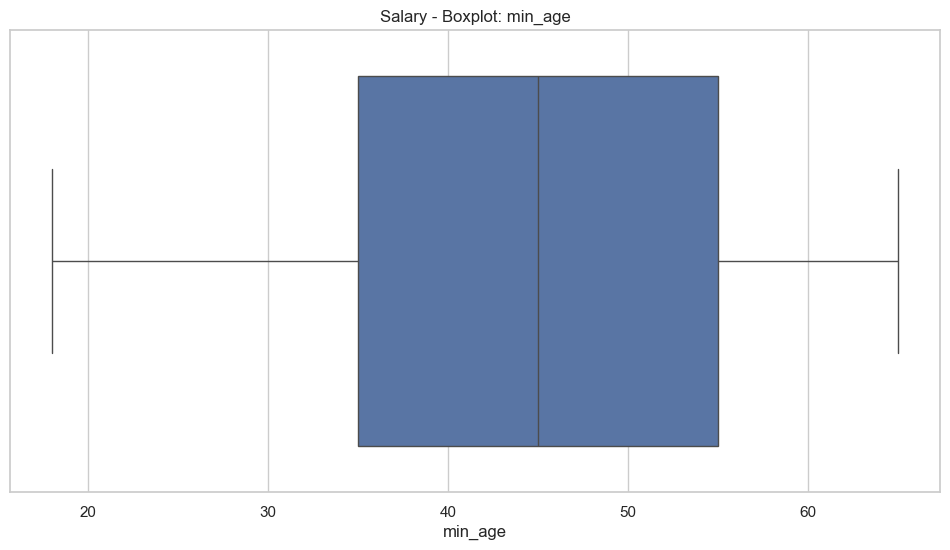

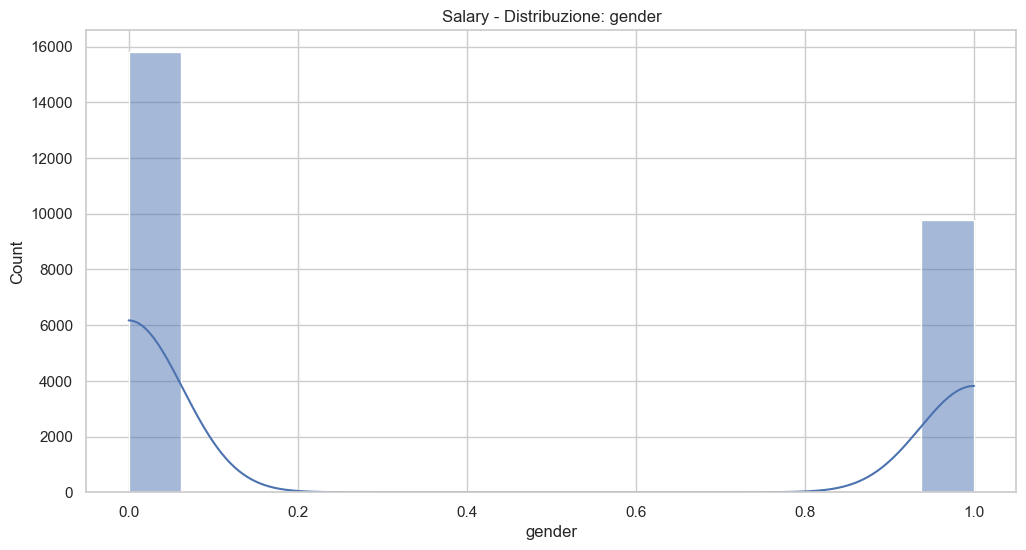

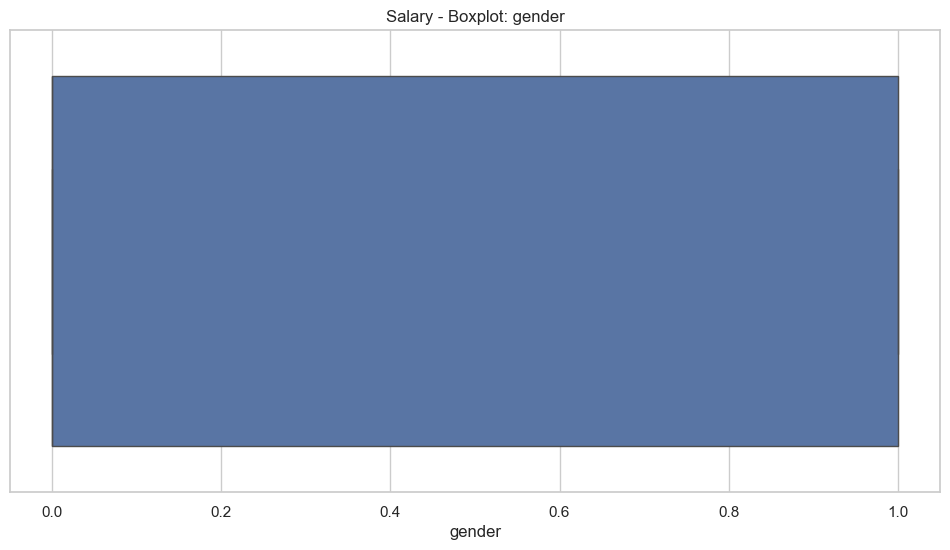

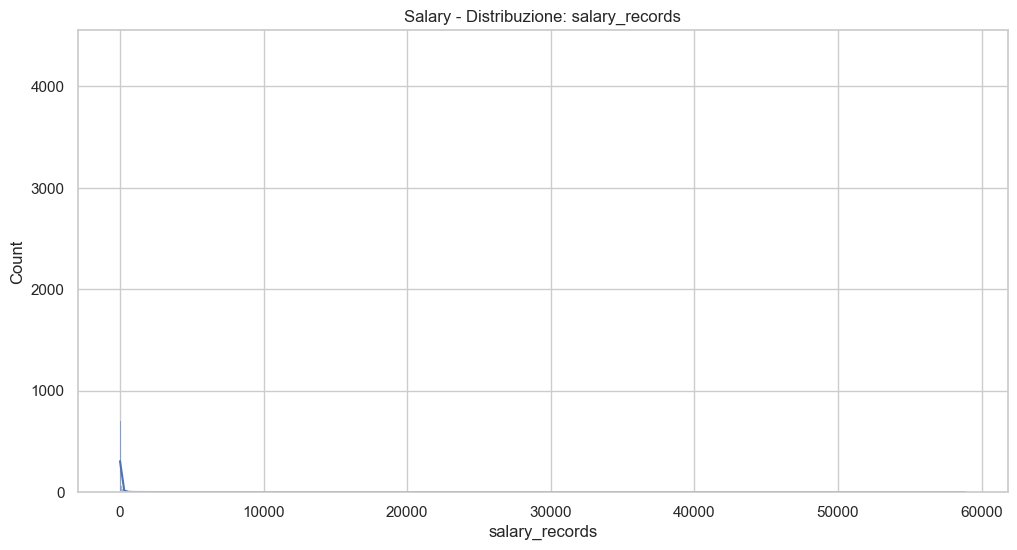

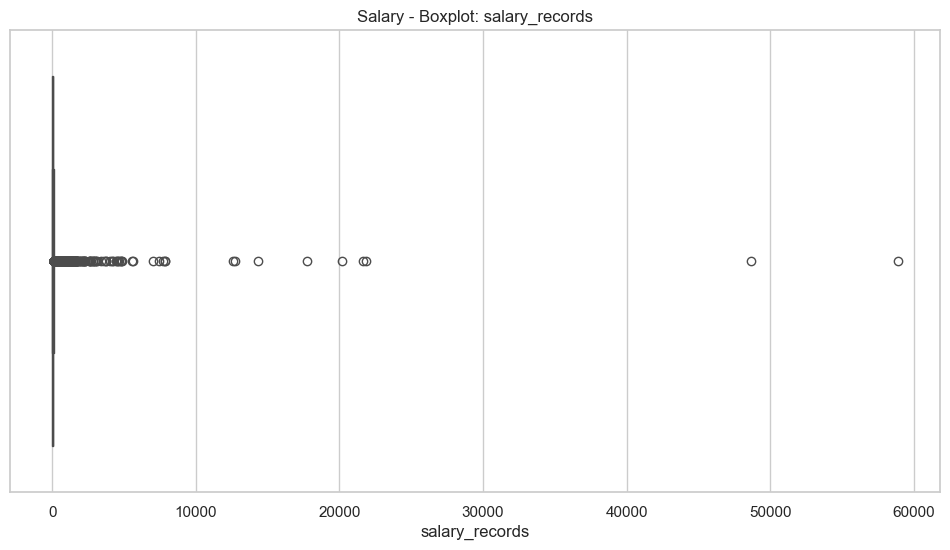

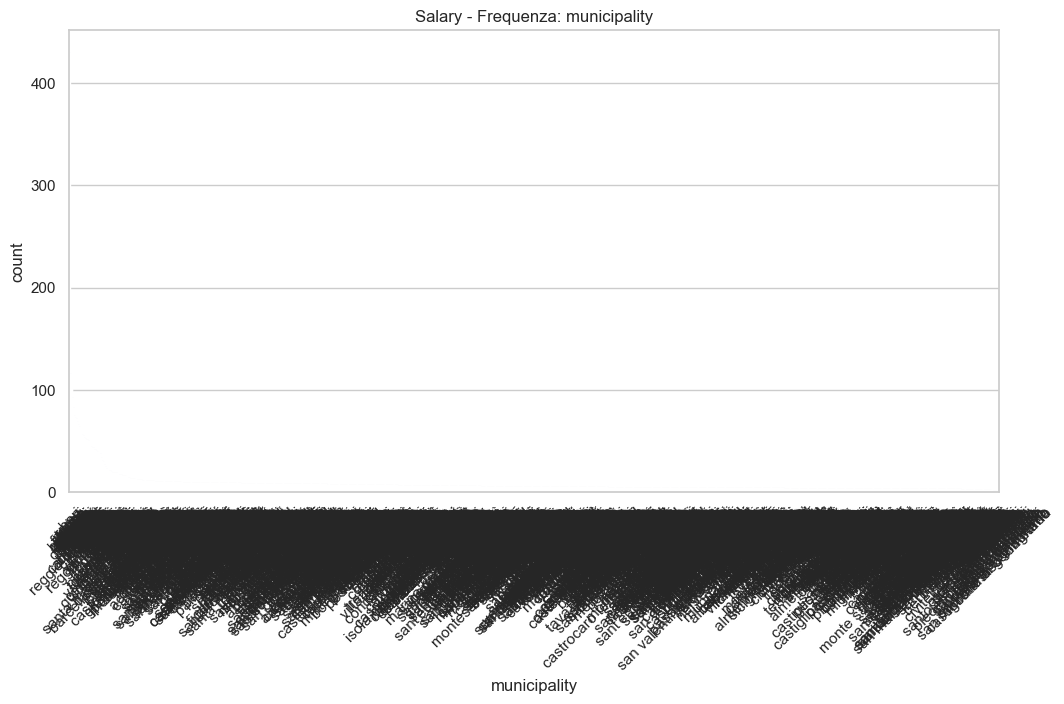

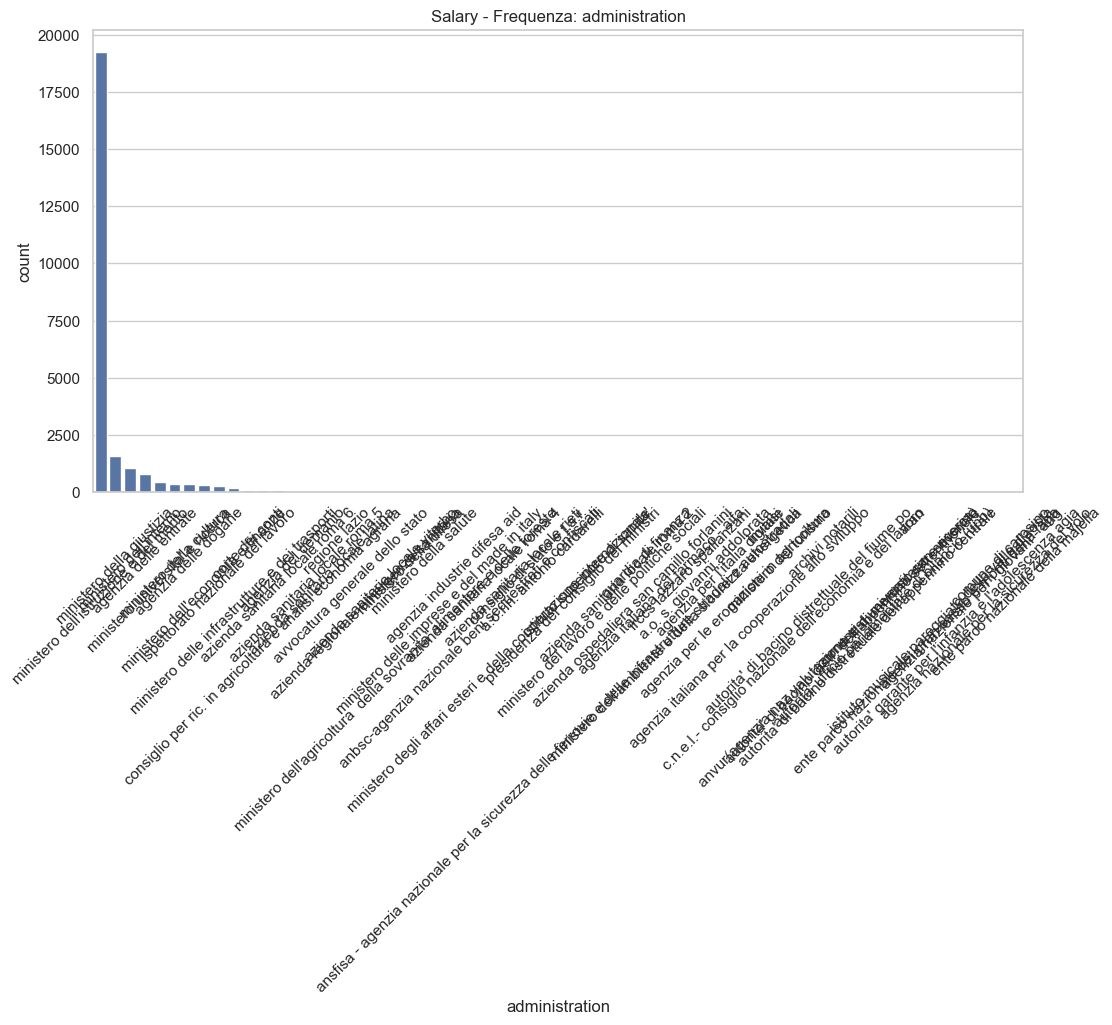

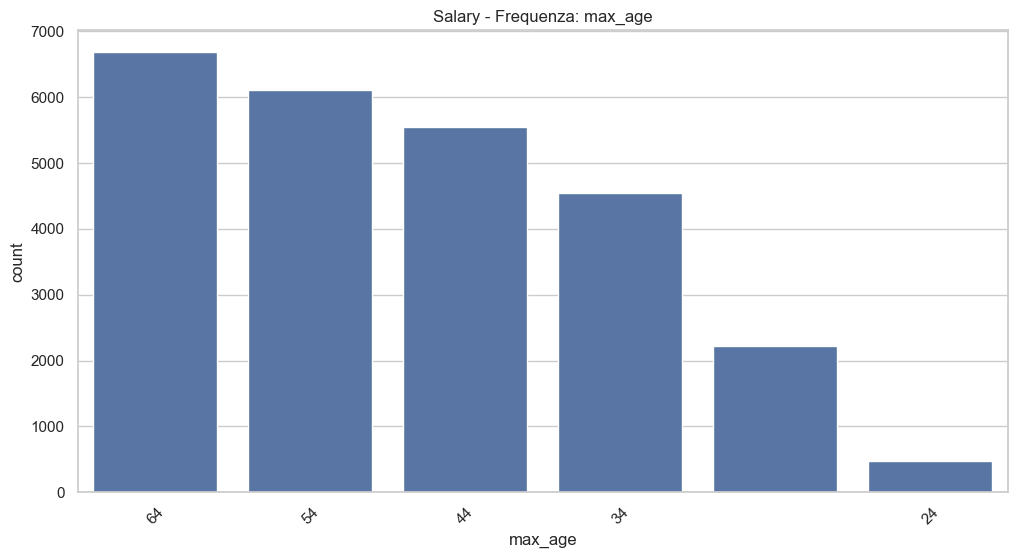

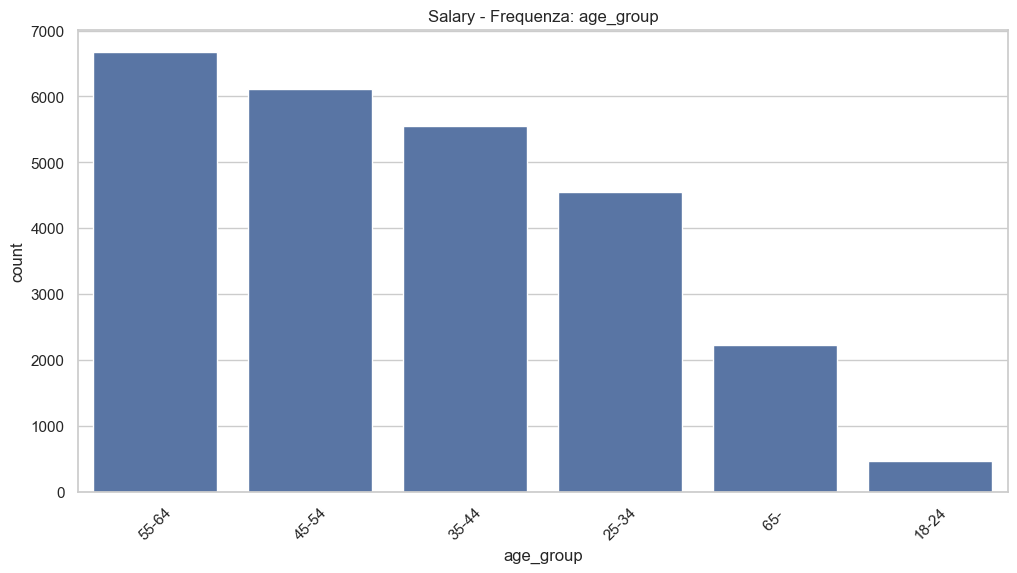

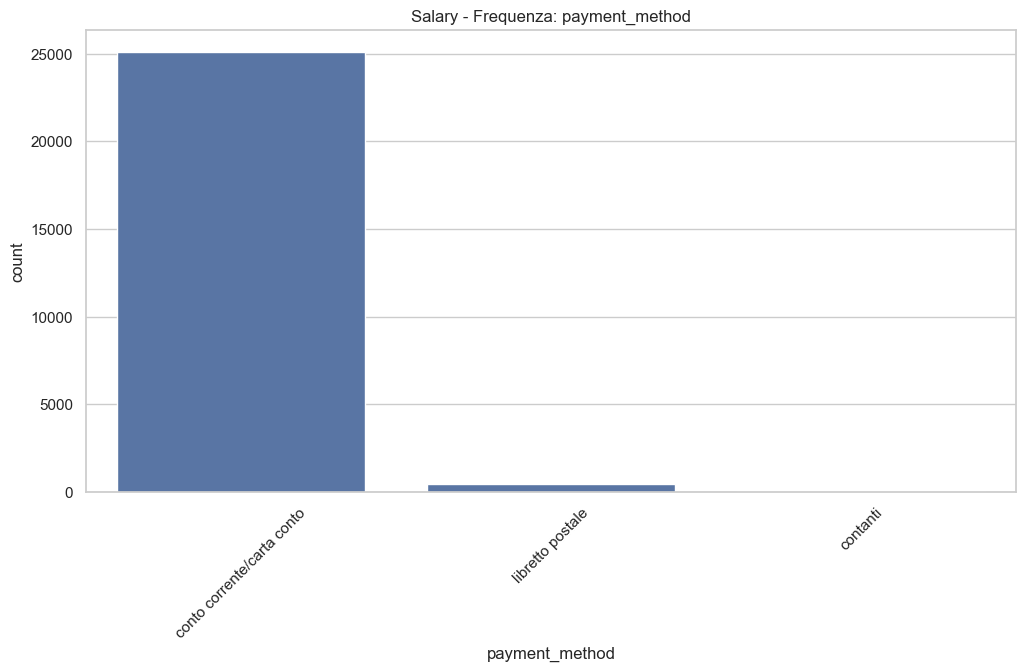


--- UNIVARIATE ANALYSIS: Income Brackets ---


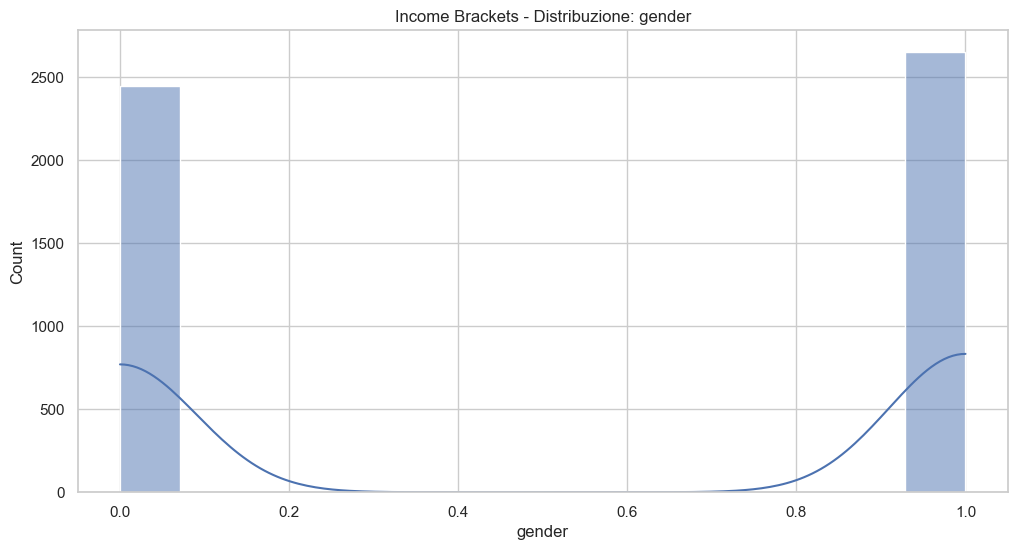

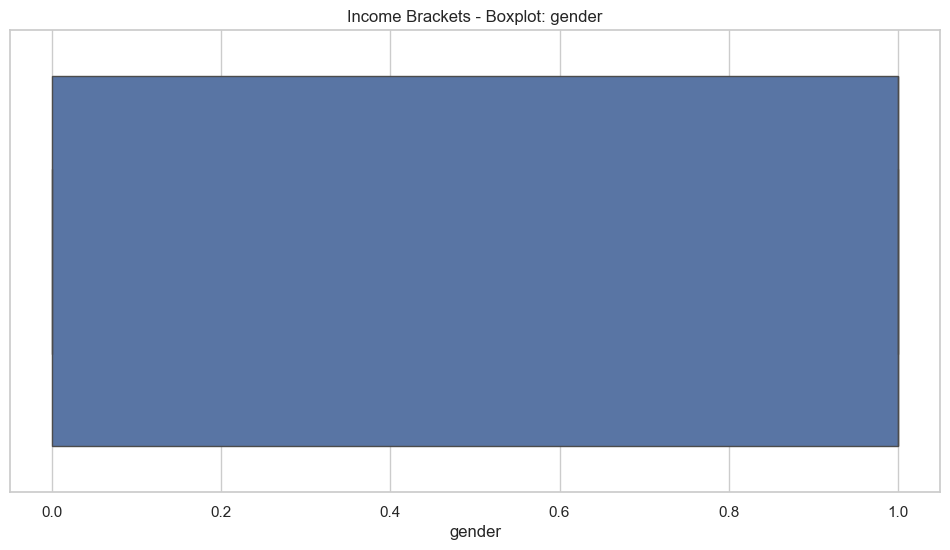

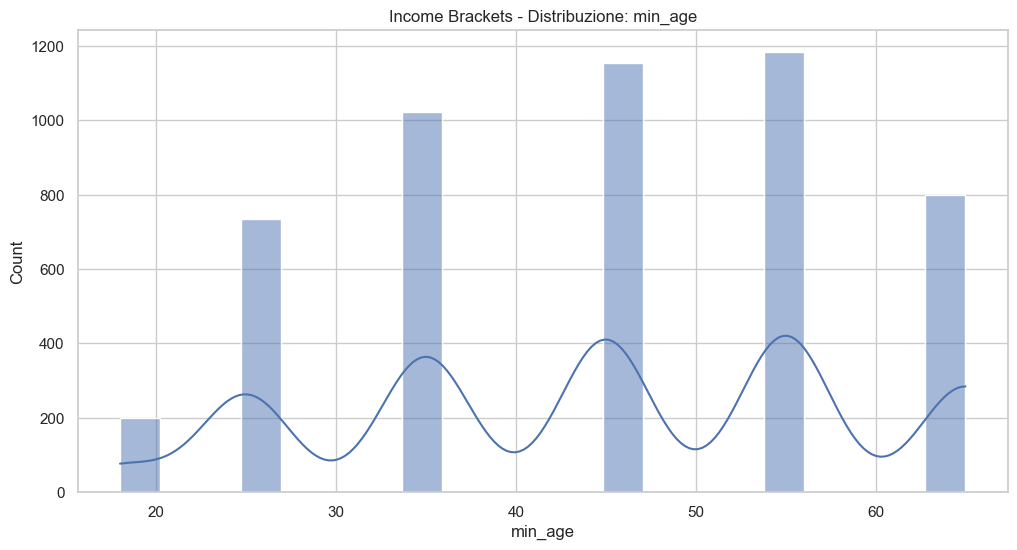

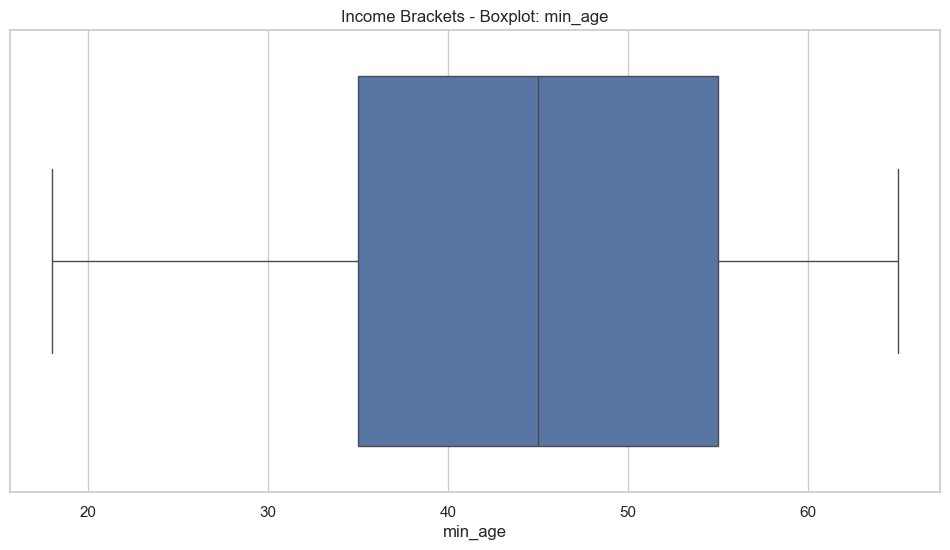

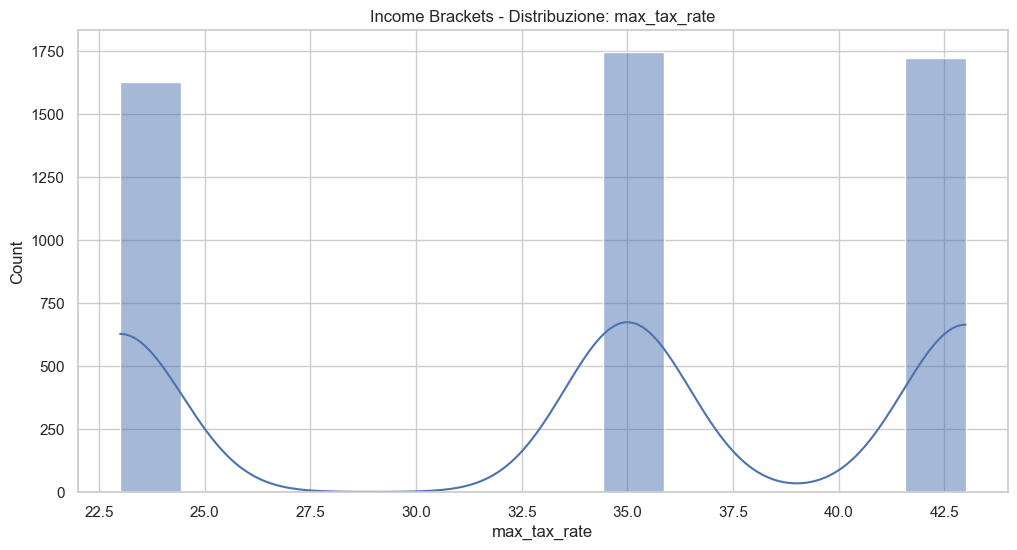

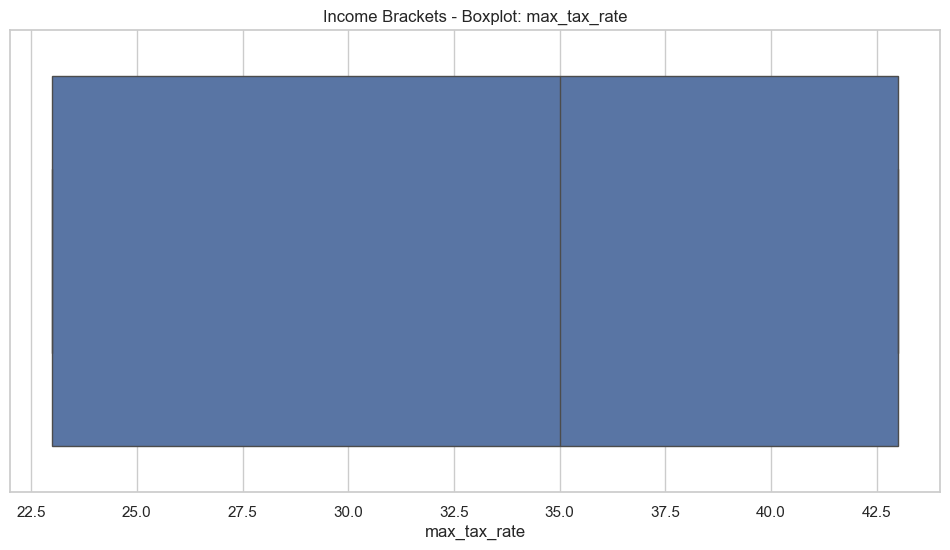

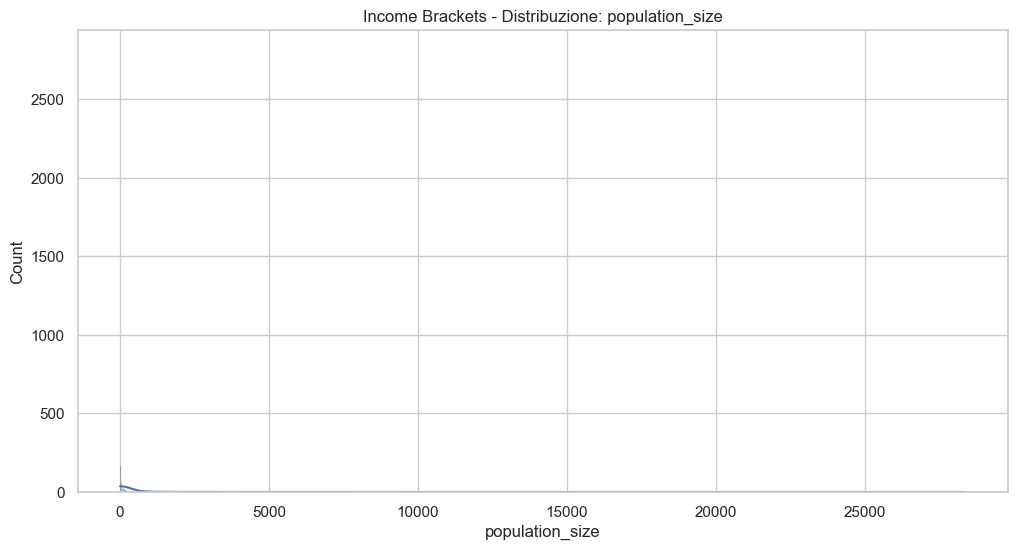

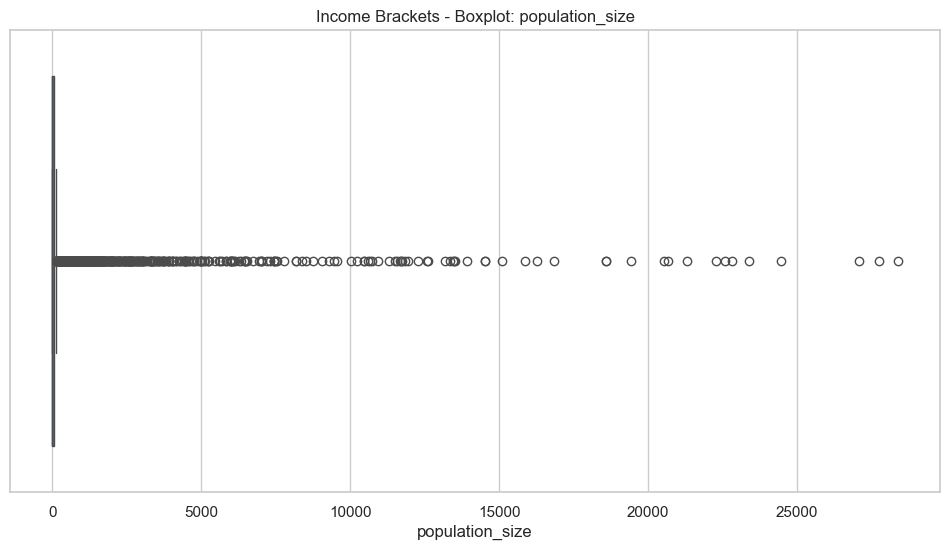

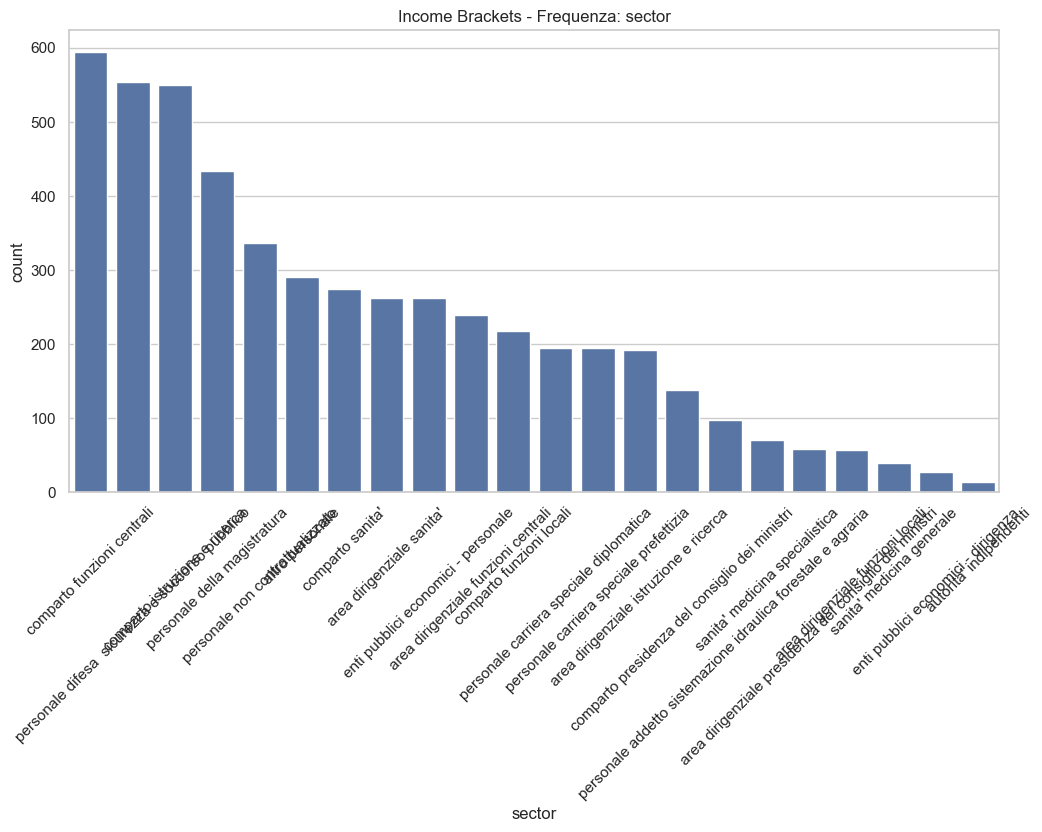

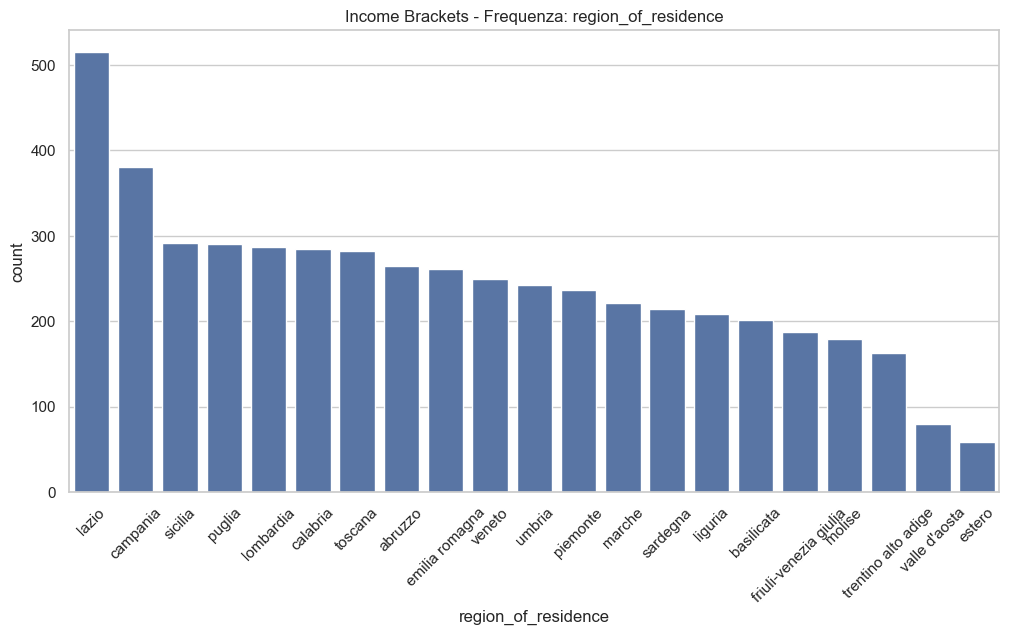

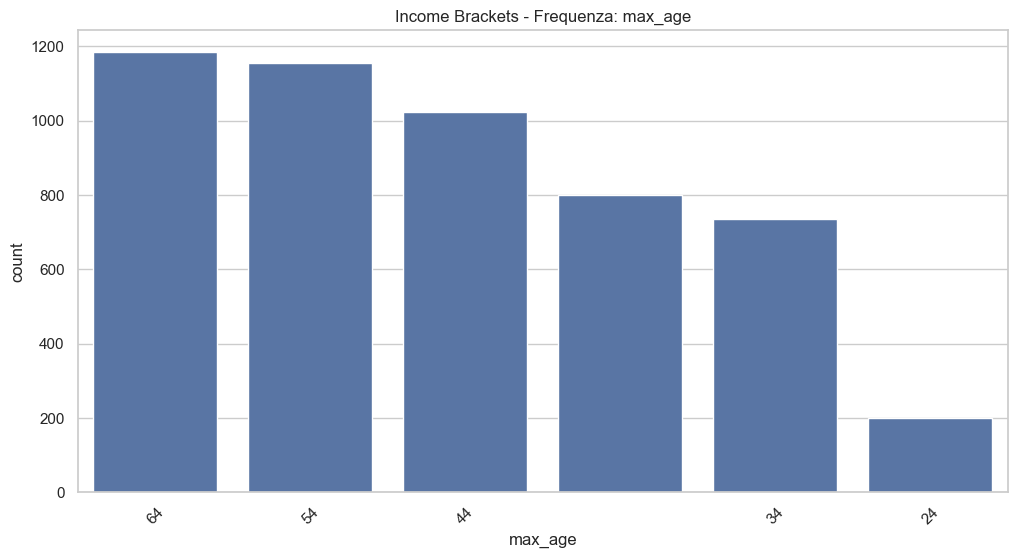

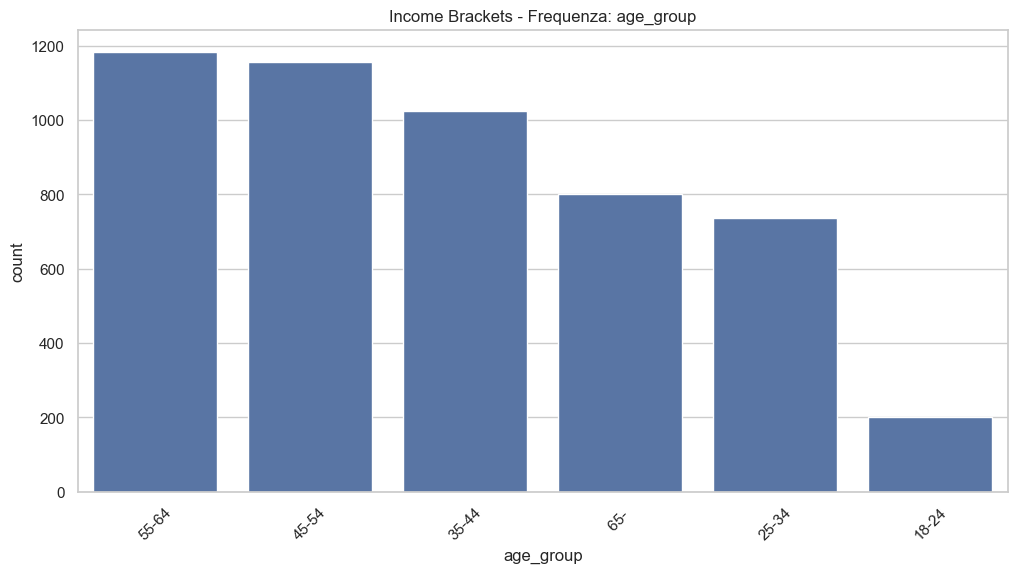

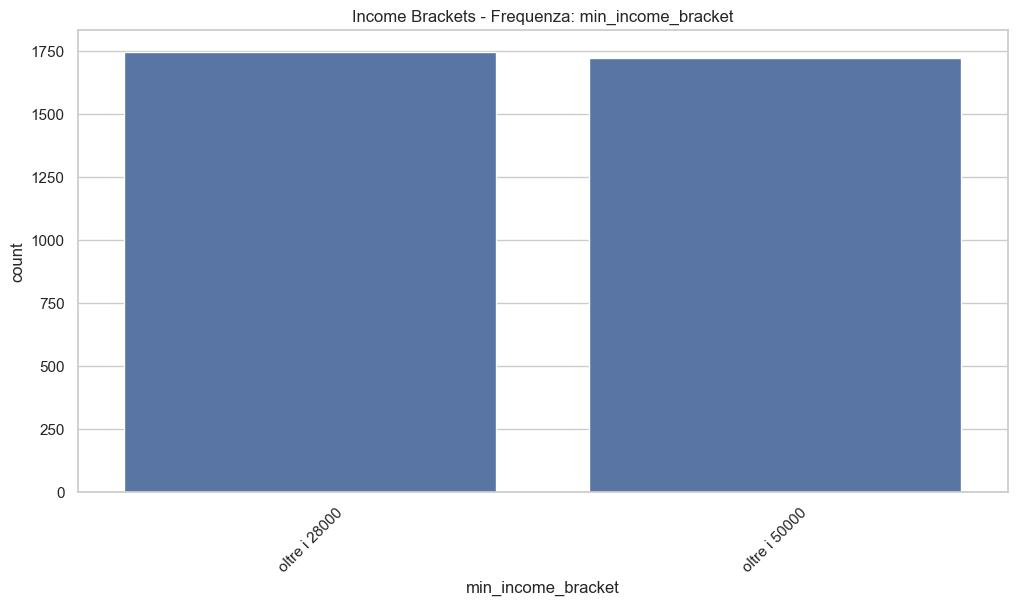


--- UNIVARIATE ANALYSIS: Commuters ---


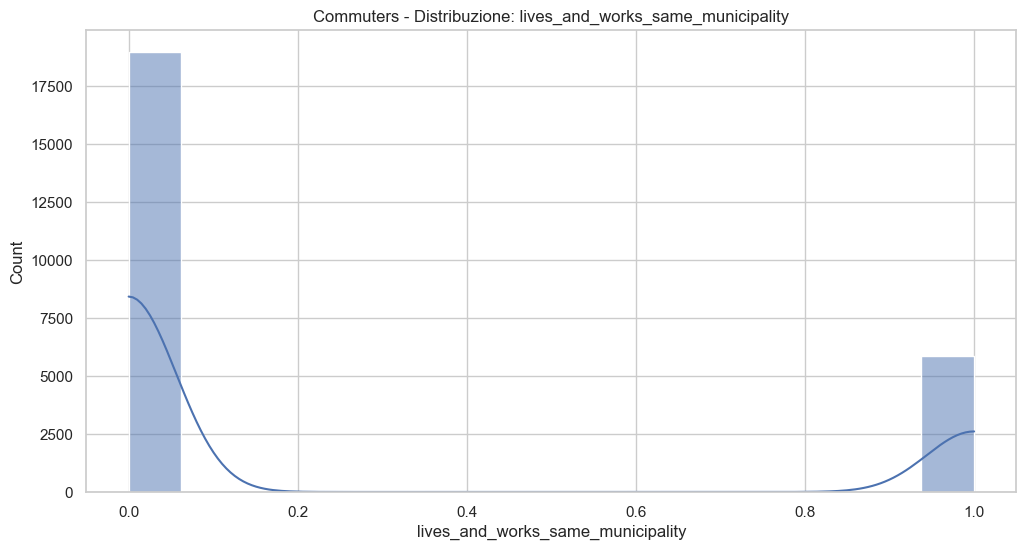

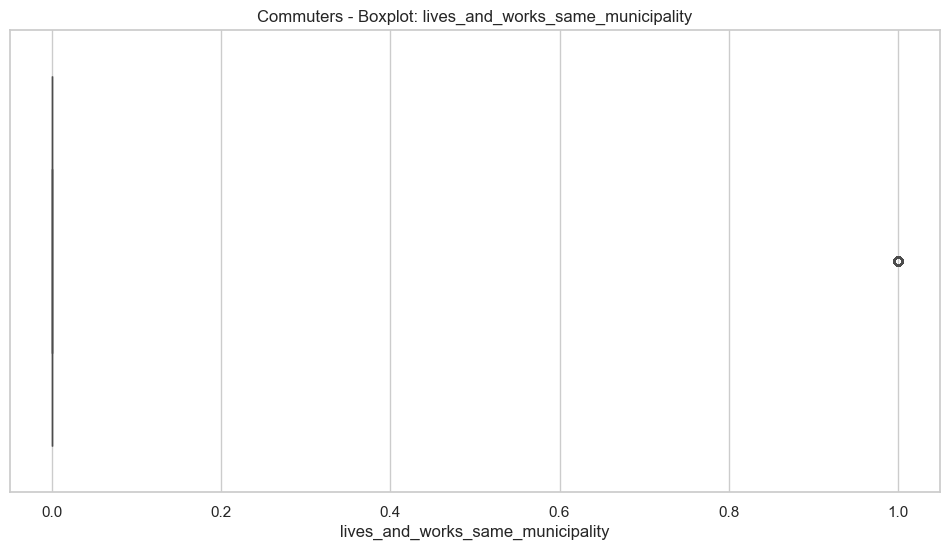

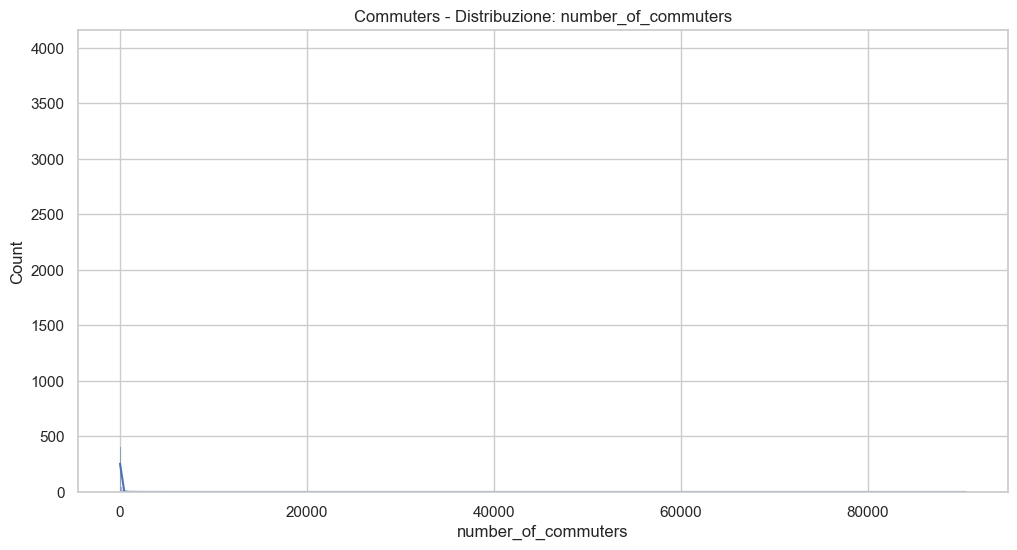

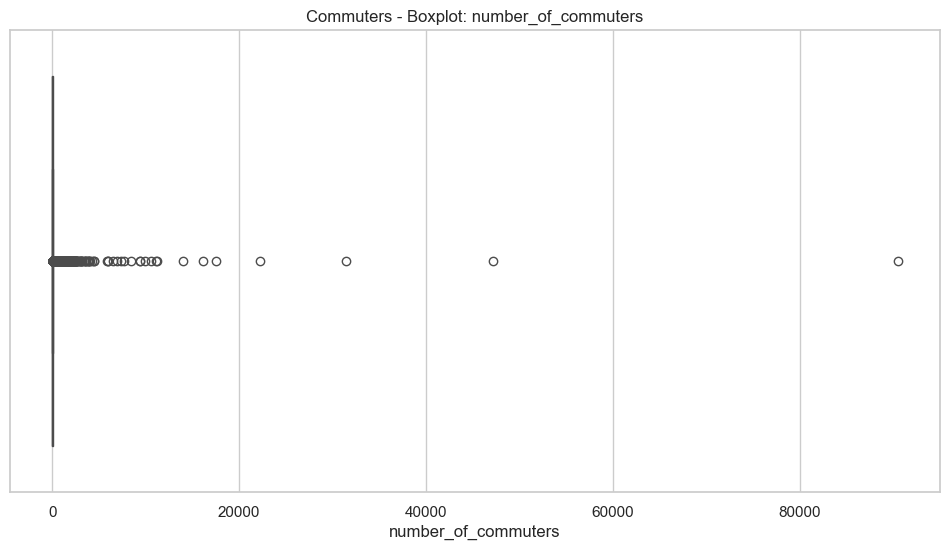

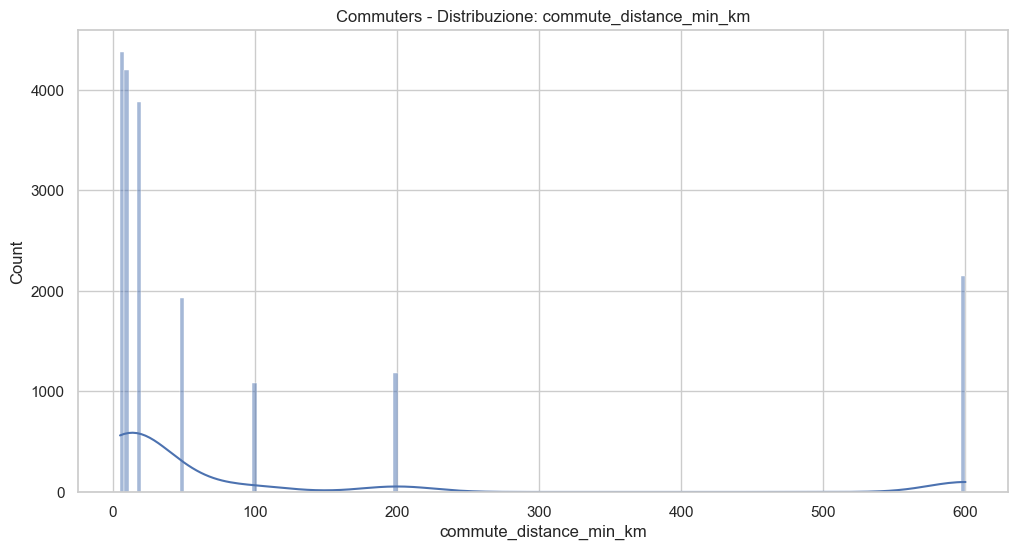

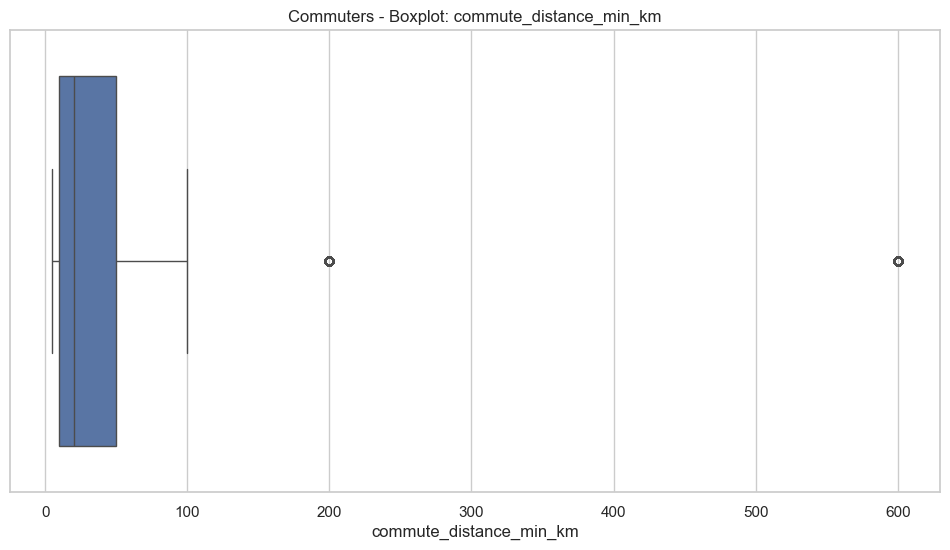

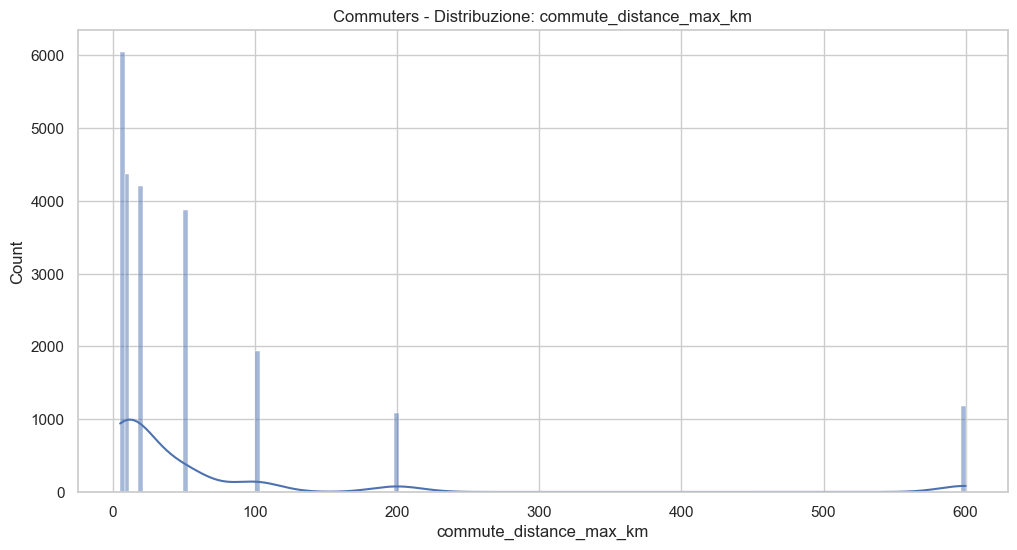

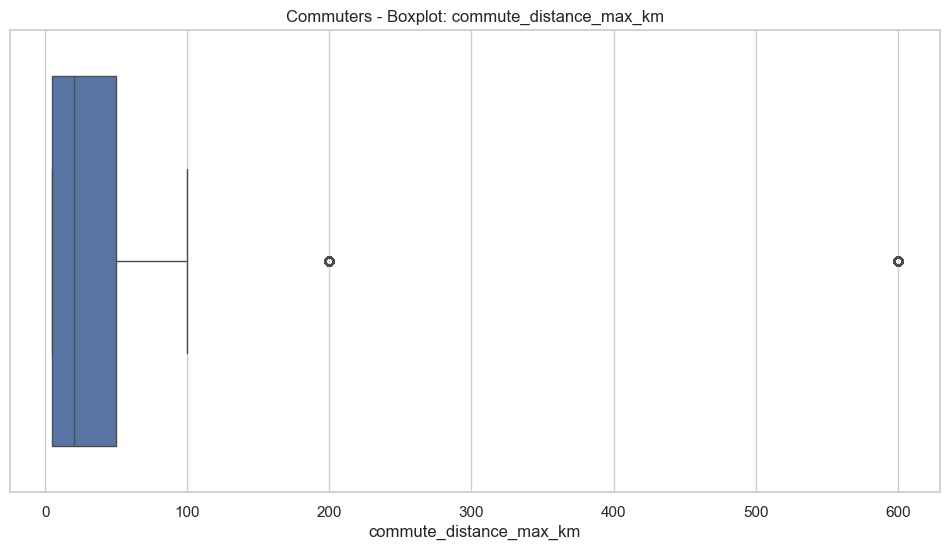

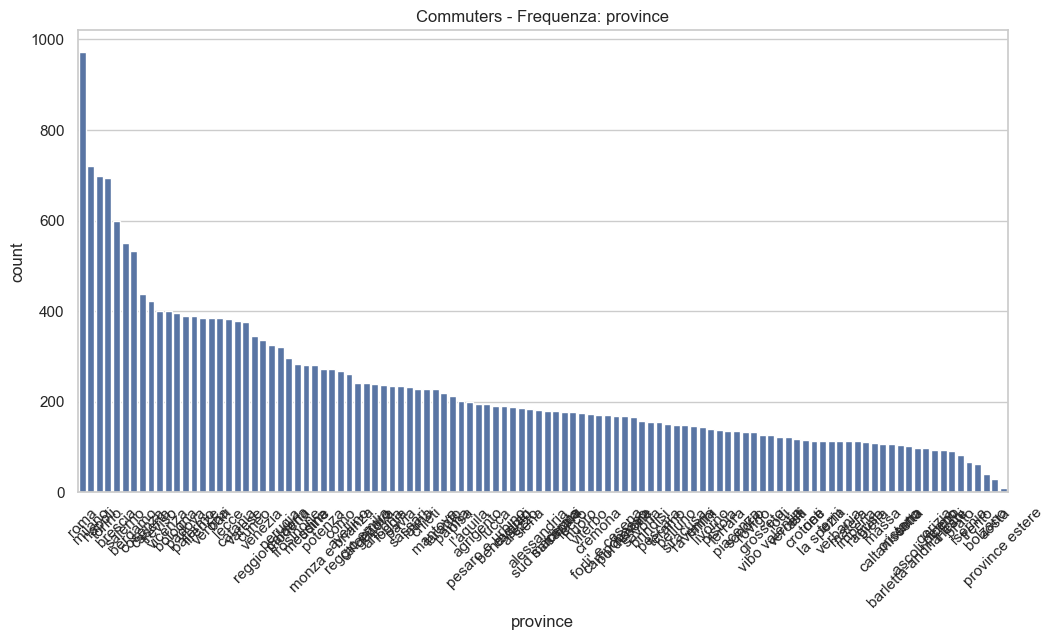

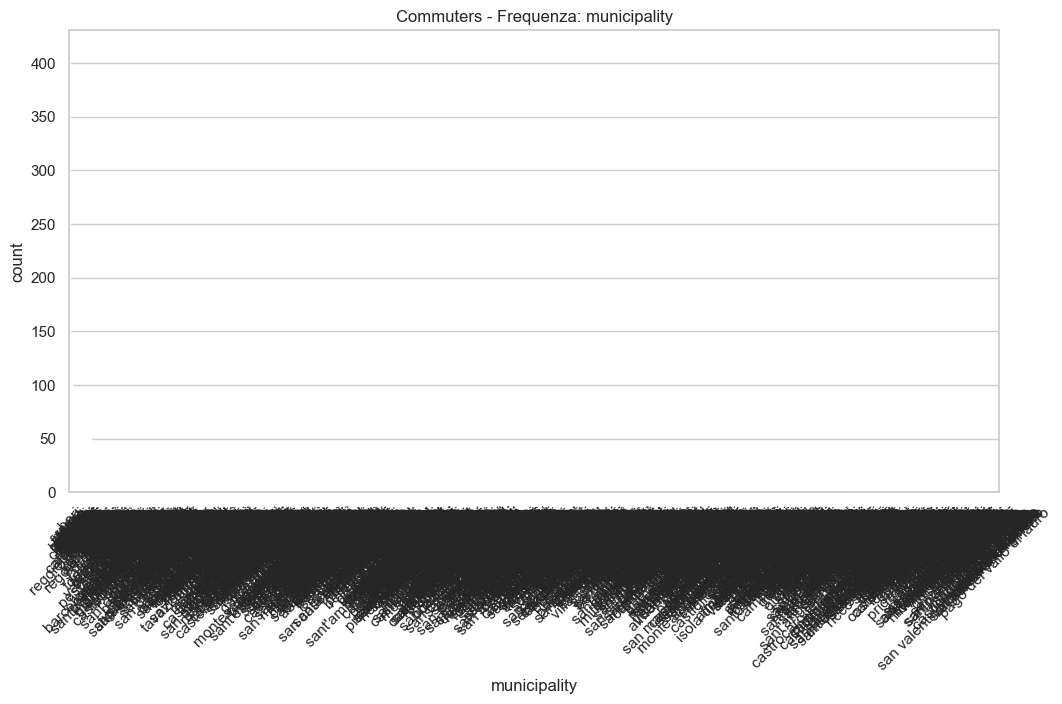

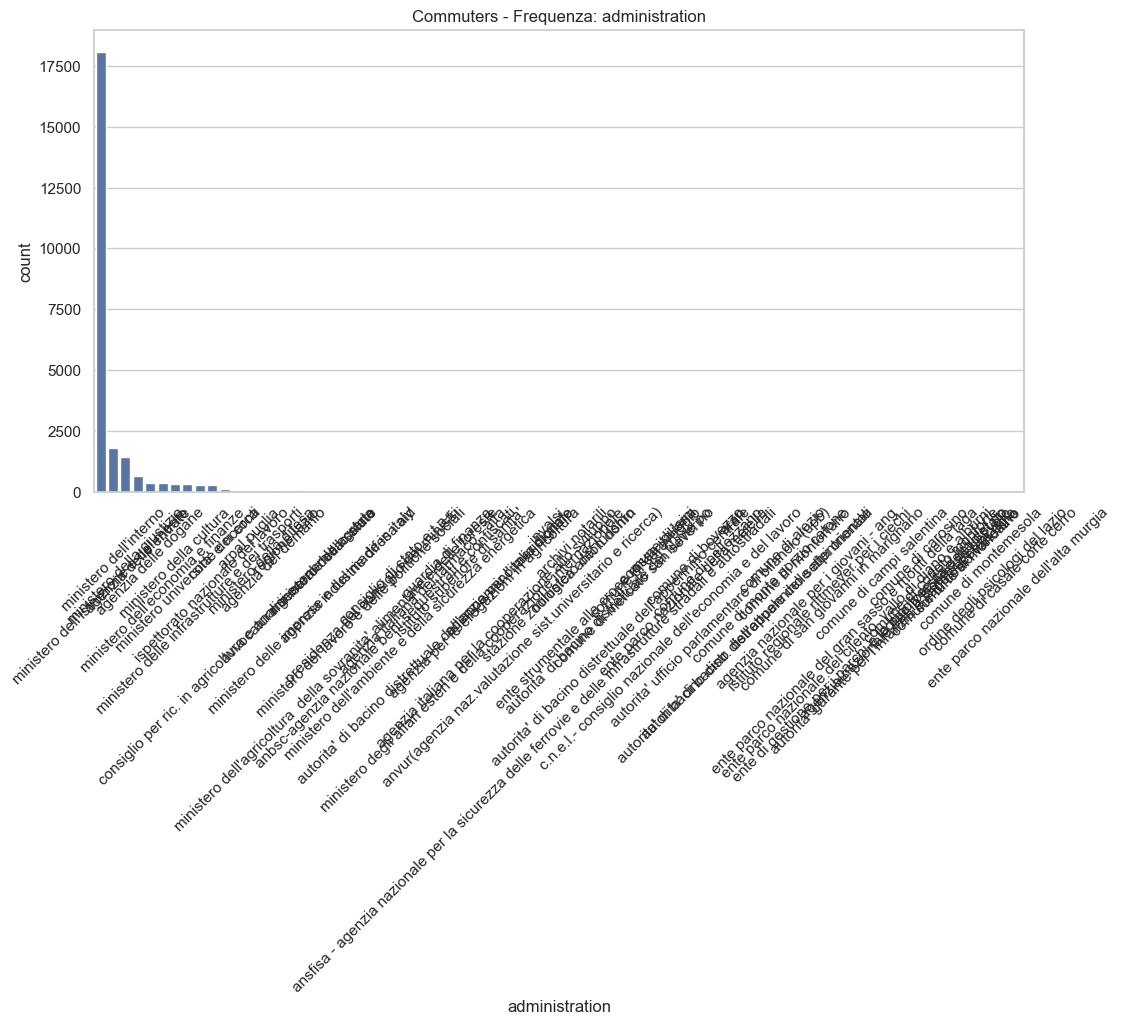

In [16]:
# Univariate analysis
for name, df in datasets.items():
    print(f"\n--- UNIVARIATE ANALYSIS: {name} ---")
    numeriche = df.select_dtypes(include=[np.number])
    categoriche = df.select_dtypes(exclude=[np.number])

    # Numeric variables
    for col in numeriche.columns:
        plt.figure()
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f"{name} - Distribuzione: {col}")
        plt.show()

        plt.figure()
        sns.boxplot(x=df[col])
        plt.title(f"{name} - Boxplot: {col}")
        plt.show()

    # Categorical variables
    for col in categoriche.columns[:5]:
        plt.figure()
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f"{name} - Frequenza: {col}")
        plt.show()


--- OUTLIER DETECTION: Admin Access ---
gender: 0 outlier (0.00%)
min_age: 0 outlier (0.00%)
number_of_occurrences: 1360 outlier (15.95%)


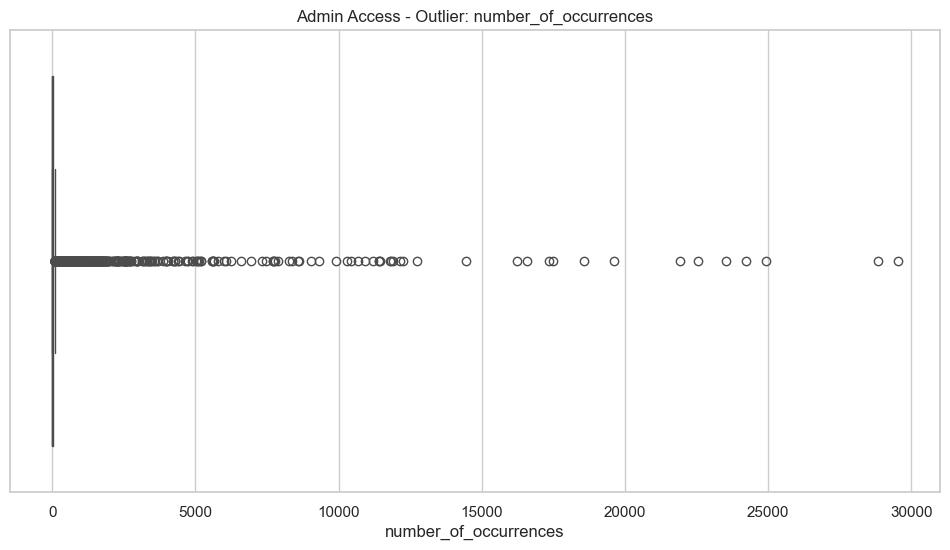


--- OUTLIER DETECTION: Salary ---
min_age: 0 outlier (0.00%)
gender: 0 outlier (0.00%)
salary_records: 2710 outlier (10.59%)


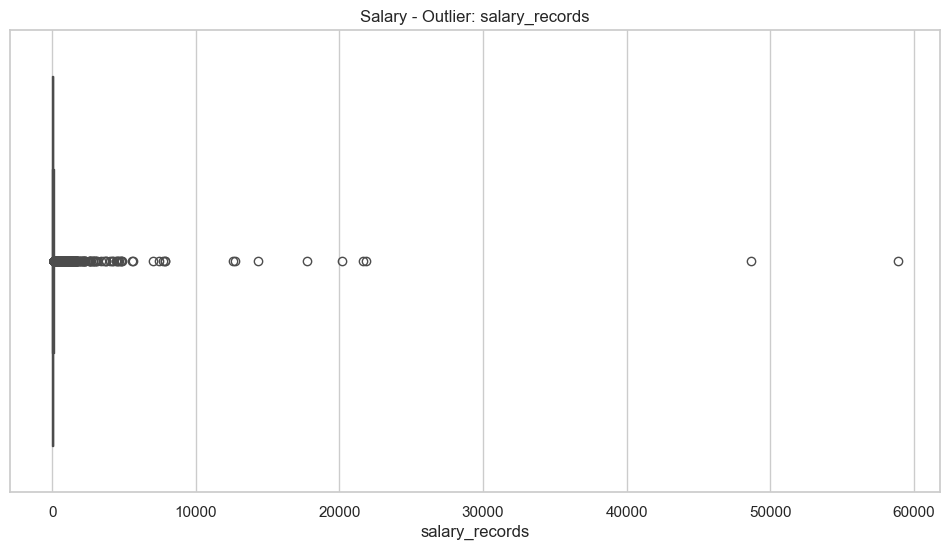


--- OUTLIER DETECTION: Income Brackets ---
gender: 0 outlier (0.00%)
min_age: 0 outlier (0.00%)
max_tax_rate: 0 outlier (0.00%)
population_size: 955 outlier (18.73%)


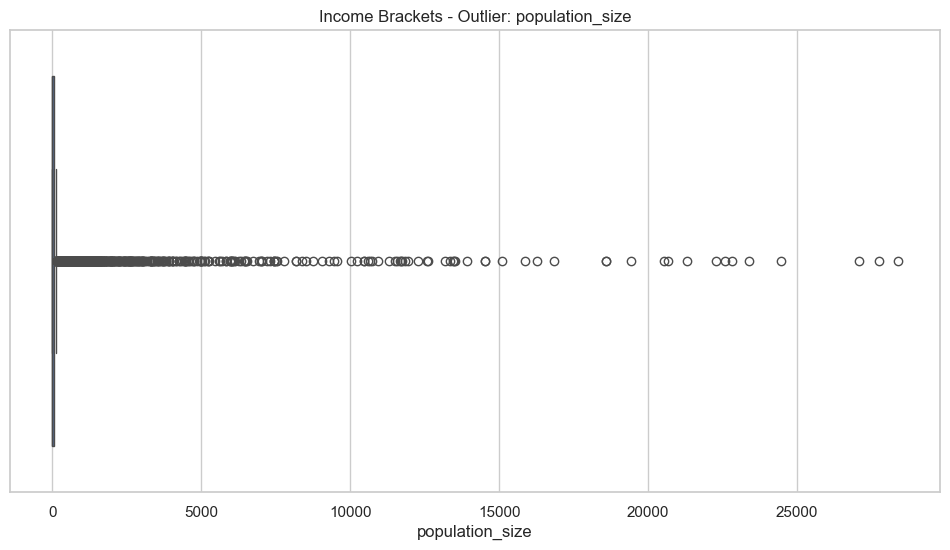


--- OUTLIER DETECTION: Commuters ---
lives_and_works_same_municipality: 5876 outlier (23.65%)


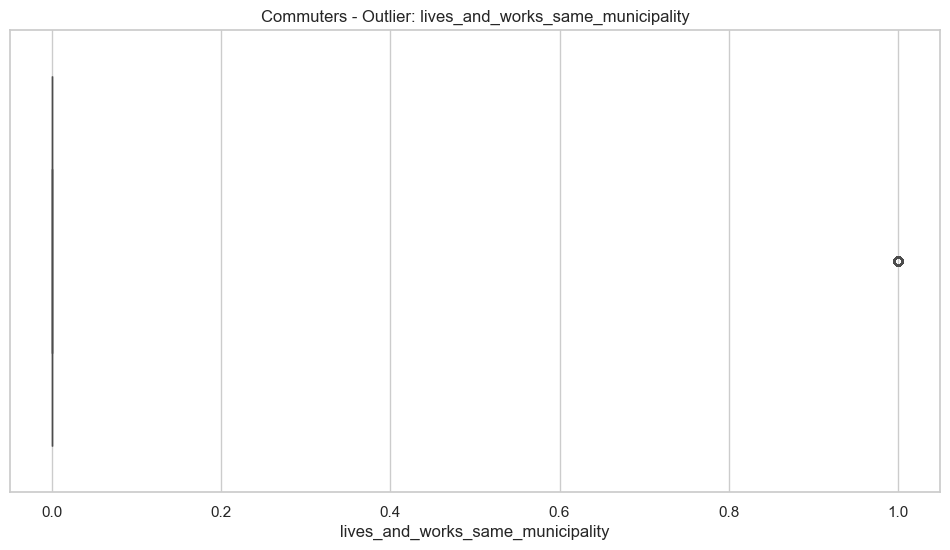

number_of_commuters: 2645 outlier (10.65%)


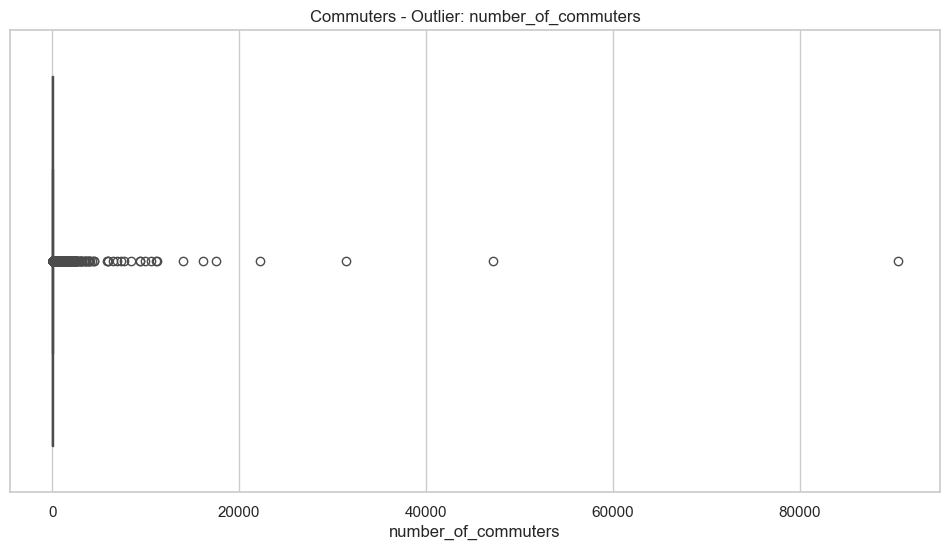

commute_distance_min_km: 3335 outlier (13.42%)


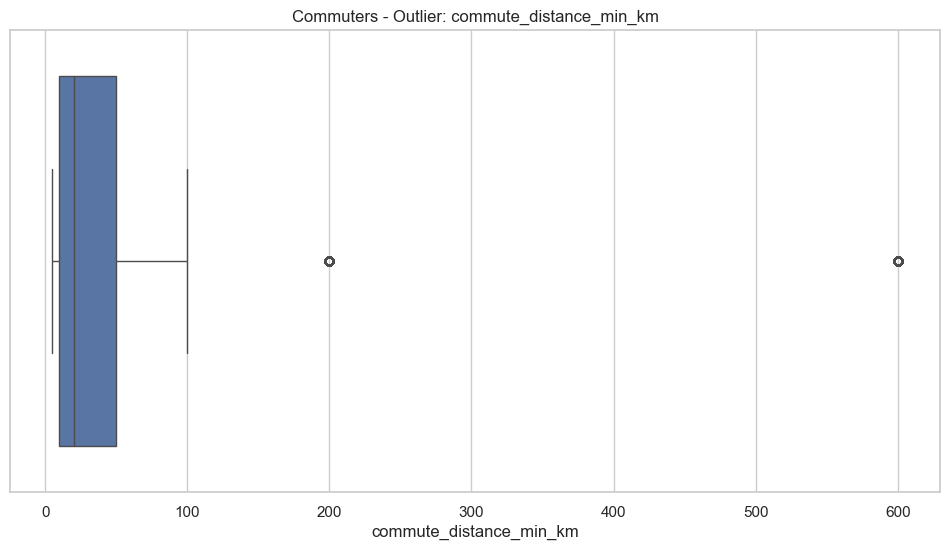

commute_distance_max_km: 2264 outlier (9.11%)


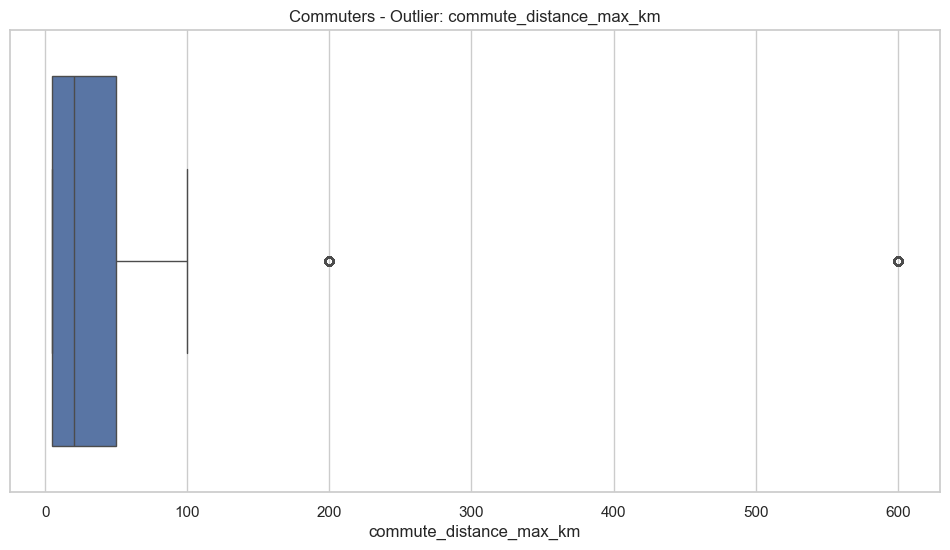

In [17]:
# Outlier detection
for name, df in datasets.items():
    print(f"\n--- OUTLIER DETECTION: {name} ---")
    numeriche = df.select_dtypes(include=[np.number])
    for col in numeriche.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
        outlier_pct = (len(outliers) / len(df)) * 100
        print(f"{col}: {len(outliers)} outlier ({outlier_pct:.2f}%)")
        if len(outliers) > 0:
            plt.figure()
            sns.boxplot(x=df[col])
            plt.title(f"{name} - Outlier: {col}")
            plt.show()

In [18]:

# How many commuters live and work in the same municipality?

commuters = pd.read_csv("datasets/commuters.csv")
same_municipality_count = commuters[commuters["lives_and_works_same_municipality"] == 1]["number_of_commuters"].count()

print(f"Total commuters who live and work in the same municipality: {same_municipality_count}")


#How many unique payment_method values exist in the dataset?
import pandas as pd

salary = pd.read_csv("datasets/salary.csv")
unique_methods = salary["payment_method"].nunique()
method_list = salary["payment_method"].unique()

print(f"Unique payment_method values: {unique_methods}")
print("Payment methods:", method_list)

# What is the most common authentication_method?
import pandas as pd

admin = pd.read_csv("datasets/admin_access.csv")
most_common_method = admin["authentication_method"].value_counts().idxmax()
count = admin["authentication_method"].value_counts().max()

print(f"The most common authentication method is '{most_common_method}' with {count} occurrences.")



Total commuters who live and work in the same municipality: 5876
Unique payment_method values: 3
Payment methods: ['conto corrente/carta conto' 'libretto postale' 'contanti']
The most common authentication method is 'spid' with 4989 occurrences.


  age_group  salary_records
0     18-24       83.376874
1     25-34       46.742354
2     35-44       64.961788
3     45-54       92.220150
4     55-64       88.029936
5      65-        24.360000


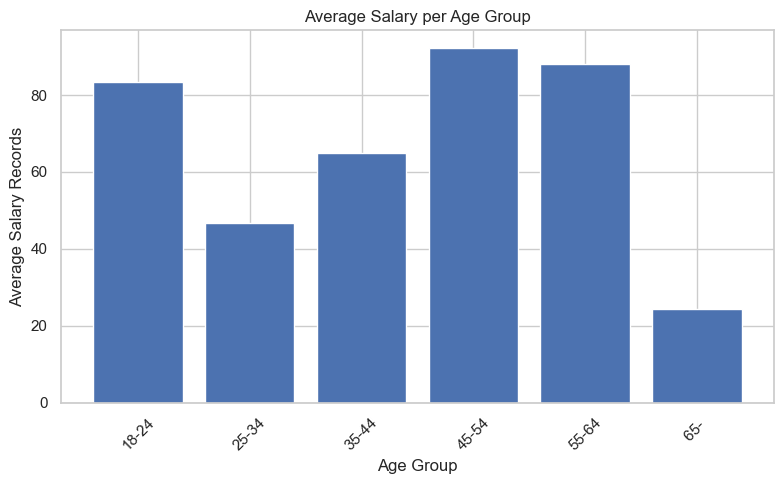

In [19]:
salary_df = pd.read_csv("datasets/salary.csv")
avg_salary_by_age_group = salary_df.groupby("age_group")["salary_records"].mean().reset_index()

print(avg_salary_by_age_group)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(avg_salary_by_age_group["age_group"], avg_salary_by_age_group["salary_records"])
plt.xlabel("Age Group")
plt.ylabel("Average Salary Records")
plt.title("Average Salary per Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

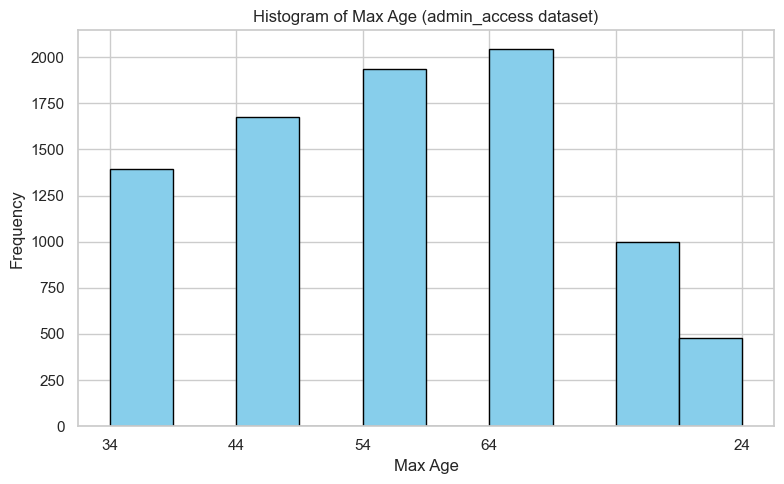

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
admin_df = pd.read_csv("datasets/admin_access.csv")

plt.figure(figsize=(8, 5))
plt.hist(admin_df["max_age"].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Max Age (admin_access dataset)")
plt.xlabel("Max Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
#What is the average commute distance for people who do not live and work in the same municipality?
commuters = pd.read_csv("datasets/commuters.csv")

commuters["commute_distance_min_km"] = pd.to_numeric(commuters["commute_distance_min_km"], errors="coerce")
commuters["commute_distance_max_km"] = pd.to_numeric(commuters["commute_distance_max_km"], errors="coerce")

commuters["commute_avg_km"] = commuters[["commute_distance_min_km", "commute_distance_max_km"]].mean(axis=1)

#filter commuters that do not live and work in the same municipality
filtered = commuters[commuters["lives_and_works_same_municipality"] == 0]

#calculate average distance
average_distance = filtered["commute_avg_km"].mean()

print(f"Average commute distance for people who do NOT live and work in the same municipality: {average_distance:.2f} km")

Average commute distance for people who do NOT live and work in the same municipality: 120.16 km


In [22]:
import pandas as pd
commuters = pd.read_csv("datasets/commuters.csv")

#convert distance in km
distance_threshold_km = 32.19  # 20 miles

#convert distance in km
commuters["commute_distance_min_km"] = pd.to_numeric(commuters["commute_distance_min_km"], errors="coerce")

#calculate total commuters per administration
total_commuters = commuters.groupby("administration")["number_of_commuters"].sum().rename("total_commuters")

#calculate commuters that do at least 20 miles (on the minimum distance)
long_commuters = commuters[commuters["commute_distance_min_km"] >= distance_threshold_km]
long_commuters_count = long_commuters.groupby("administration")["number_of_commuters"].sum().rename("over_20_miles")

#merge total commuters and long commuters   
merged = pd.merge(total_commuters, long_commuters_count, on="administration", how="left").fillna(0)

#calculate percentage
merged["percent_over_20_miles"] = (merged["over_20_miles"] / merged["total_commuters"]) * 100

#sort by percentage
result = merged.sort_values(by="percent_over_20_miles", ascending=False)

#print the top 10
print(result[["percent_over_20_miles"]].head(10))


                                                    percent_over_20_miles
administration                                                           
guardia di finanza                                              88.907803
ministero della difesa                                          88.116531
anvur(agenzia naz.valutazione sist.universitari...              84.609186
autorita' di bacino distr. dell'appennino sette...              66.666667
consiglio di stato e t.a.r.                                     63.118953
ansfisa - agenzia nazionale per la sicurezza de...              59.409594
ministero universita' e ricerca                                 53.863314
ente parco nazionale del gran sasso e monti del...              48.275862
ente strumentale alla croce rossa italiana                      46.153846
agenzia nazionale per i giovani - ang                           40.000000
